In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
PARAMETER = 10
LINEAR_REGRESSION_ERROR_RANGE = 3
ERROR_RANGE = 1.0001
MUTATION_RATE = 0.1
NUM_POINTS = 45
NUM_ELITES = 2

In [ ]:
def generate_random_points(num_points, slope, intercept):
    noise = np.random.normal(0, LINEAR_REGRESSION_ERROR_RANGE, num_points)
    x_coords = np.random.uniform(-PARAMETER, PARAMETER, num_points)
    y_coords = slope * x_coords + intercept + noise
    return np.column_stack((x_coords, y_coords))

In [ ]:
def generate_random_lines(num_lines):
    lines = []
    for _ in range(num_lines):
        slope = random.uniform(-PARAMETER, PARAMETER)
        intercept = random.uniform(-PARAMETER, PARAMETER)
        lines.append([slope, intercept])
    return lines

In [ ]:
def calculate_errors(lines, points):
    x = points[:, 0]
    y = points[:, 1]

    lines = np.array(lines)
    slopes = lines[:, 0]
    intercepts = lines[:, 1]

    y_pred = slopes[:, None] * x + intercepts[:, None]
    errors = np.sum((y_pred - y) ** 2, axis=1)

    return errors

In [ ]:
def mutate(line, mutation_rate=MUTATION_RATE):
    slope, intercept = line

    if random.random() < mutation_rate:
        slope += slope * random.uniform(-ERROR_RANGE, ERROR_RANGE)

    if random.random() < mutation_rate:
        intercept += intercept * random.uniform(-ERROR_RANGE, ERROR_RANGE)

    return [slope, intercept]

In [ ]:
def create_next_generation(lines, points, num_elites=NUM_ELITES):
    errors = calculate_errors(lines, points)

    sorted_indices = np.argsort(errors)
    sorted_lines = [lines[i] for i in sorted_indices]

    next_generation = sorted_lines[:num_elites]

    while len(next_generation) < len(lines):
        parent1 = random.choice(sorted_lines[:len(sorted_lines)//2])
        parent2 = random.choice(sorted_lines[:len(sorted_lines)//2])

        child_slope = parent1[0]
        child_intercept = parent2[1]

        child = [child_slope, child_intercept]
        child = mutate(child)

        next_generation.append(child)

    return next_generation

In [ ]:
def plot_progress(points, actual_line, predicted_line, generation):
  x = points[:, 0]
  y = points[:, 1]

  plt.figure(figsize=(8, 6))
  plt.scatter(x, y, label="Data Points", color="blue")

  x_fit = np.linspace(min(x), max(x), 100)
  y_actual = actual_line[0] * x_fit + actual_line[1]
  y_predicted = predicted_line[0] * x_fit + predicted_line[1]

  plt.plot(x_fit, y_actual, label="Actual Line", color="green", linewidth=2)
  plt.plot(x_fit, y_predicted, label=f"Predicted Line (Gen {generation})", color="red", linestyle="dashed")

  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Genetic Algorithm Progress")
  plt.legend()
  plt.show()

In [ ]:
def genetic_algorithm():
    num_points = NUM_POINTS
    true_slope = random.uniform(-PARAMETER, PARAMETER)
    true_intercept = random.uniform(-PARAMETER, PARAMETER)
    test_points = generate_random_points(num_points, true_slope, true_intercept)
    actual_line = [true_slope, true_intercept]

    print("Actual Line:", actual_line)

    population_size = 20
    generations = 100

    lines = generate_random_lines(population_size)

    for generation in range(generations):
        errors = calculate_errors(lines, test_points)

        best_index = np.argmin(errors)
        best_line = lines[best_index]
        best_error = errors[best_index]

        plot_progress(test_points, actual_line, best_line, generation)

        if best_error < ERROR_RANGE:
            print(f"Stopping early at generation {generation}")
            print("Best Line:", best_line)
            print("Error:", best_error)
            break

        lines = create_next_generation(lines, test_points)

    print("Final Best Line:", best_line)
    print("Final Error:", best_error)

Actual Line: [-7.195647075425626, 3.281774674580964]


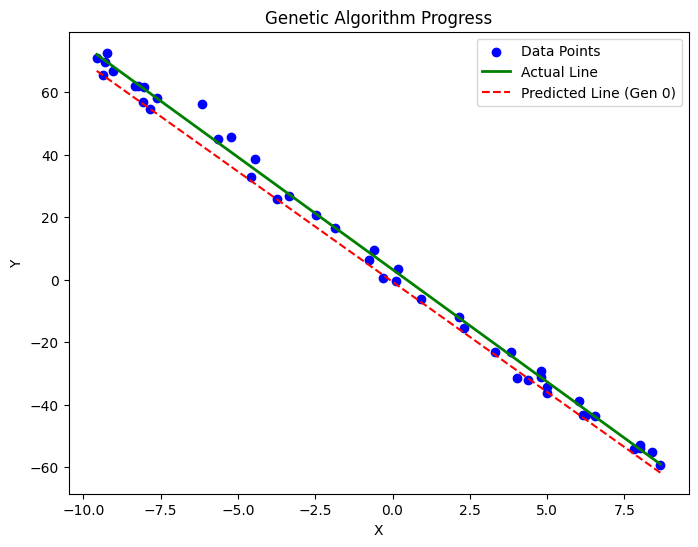

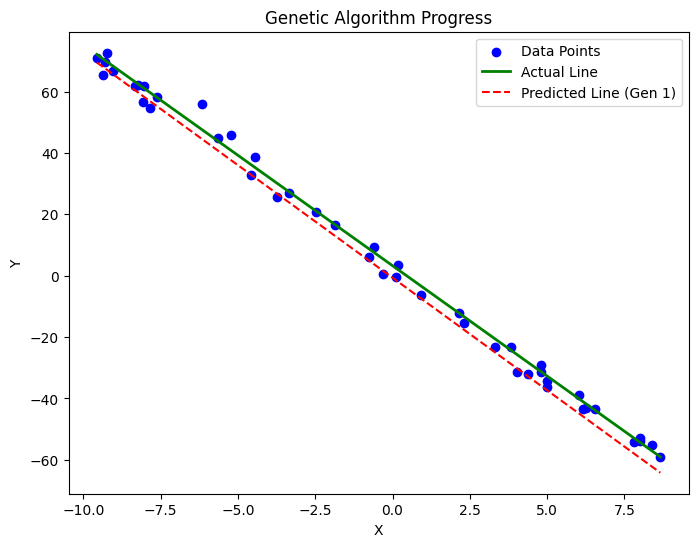

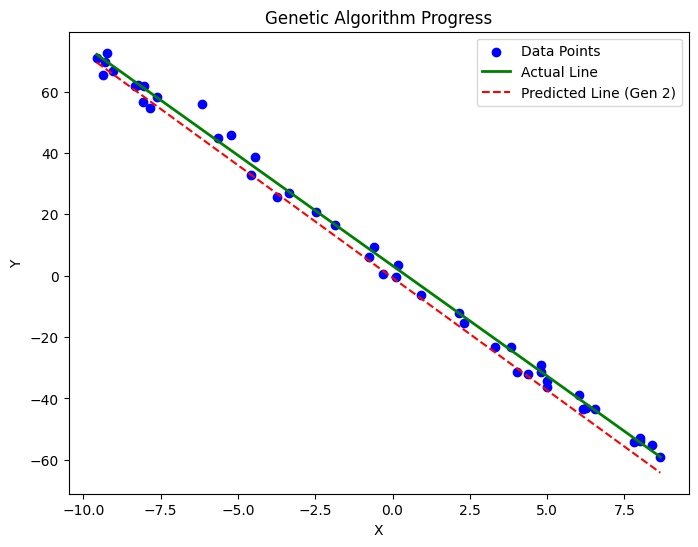

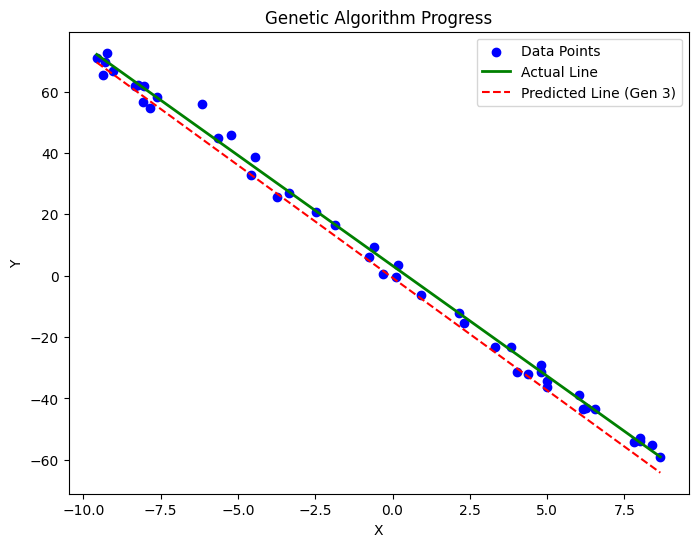

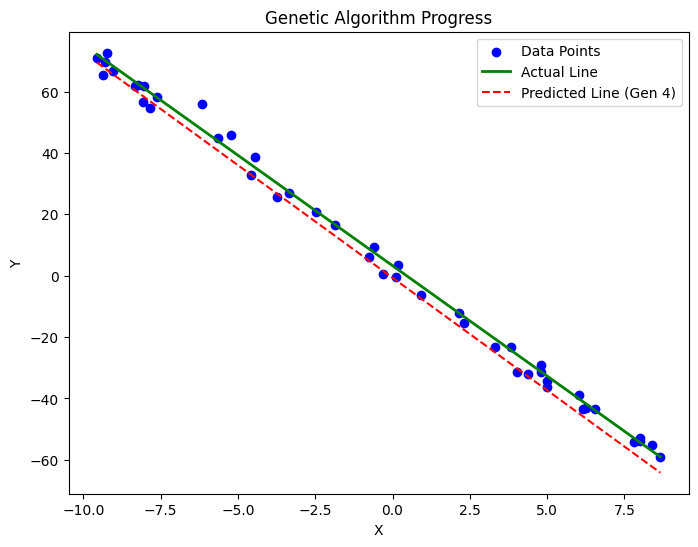

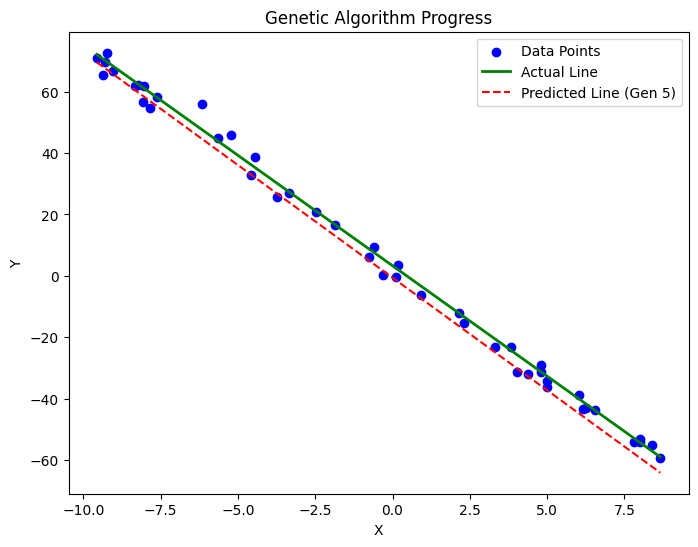

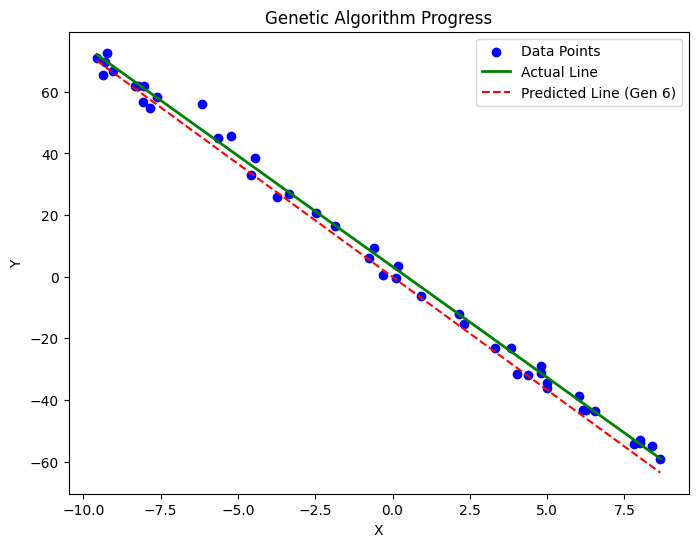

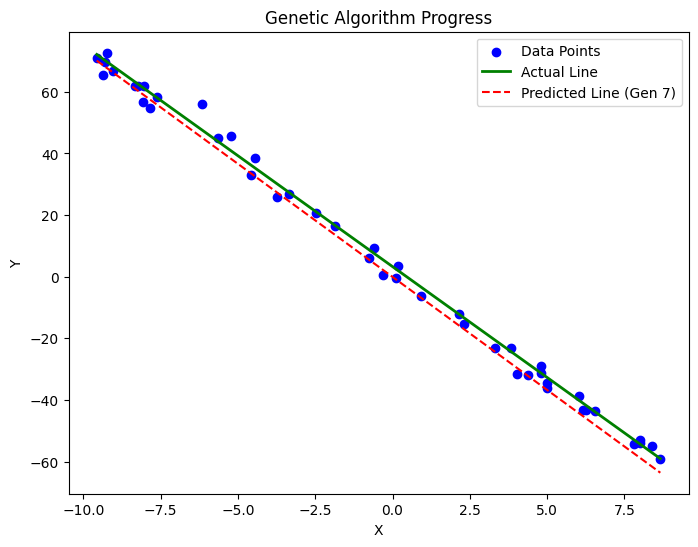

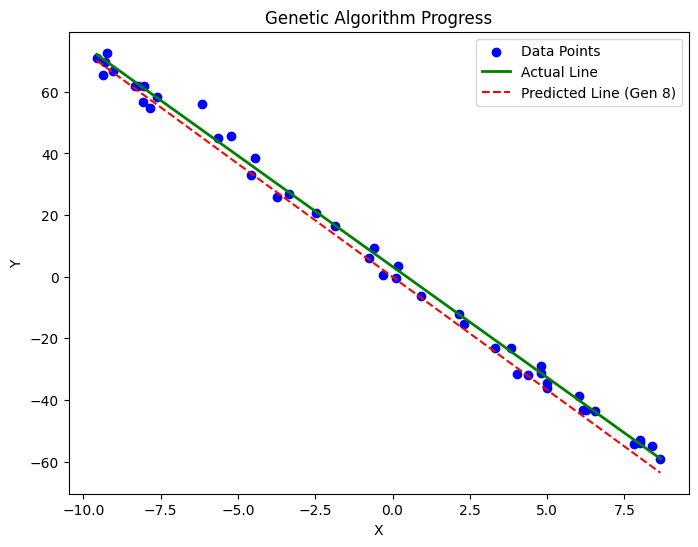

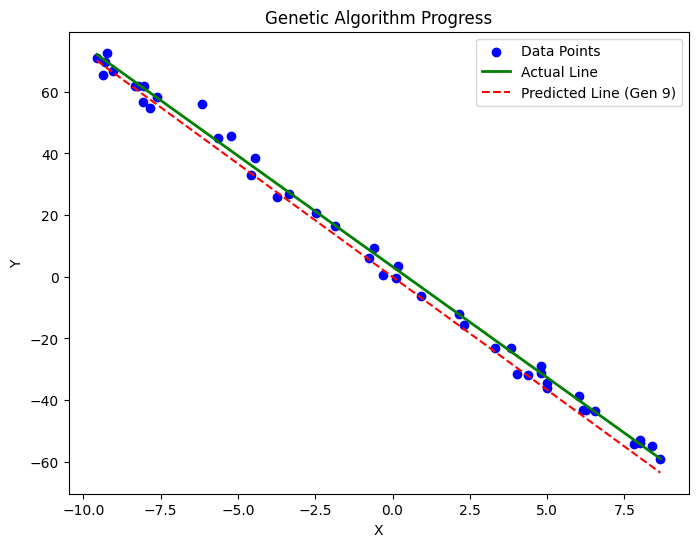

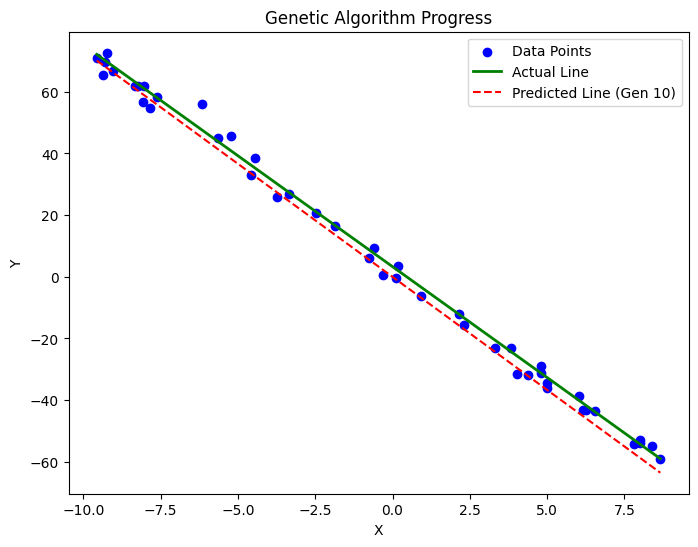

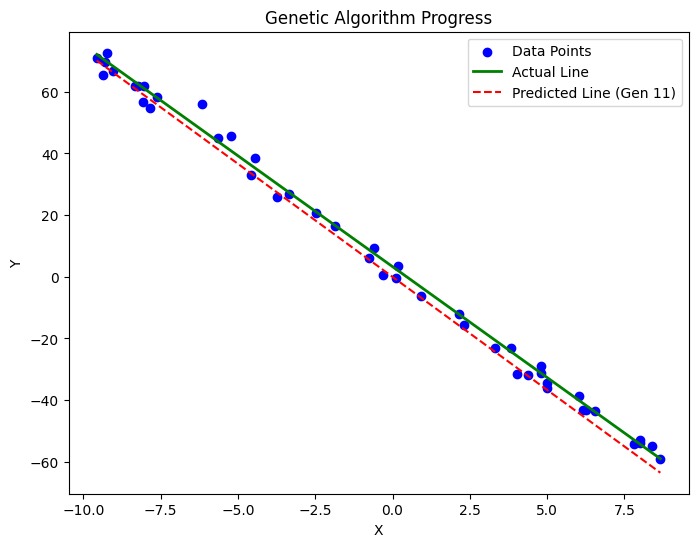

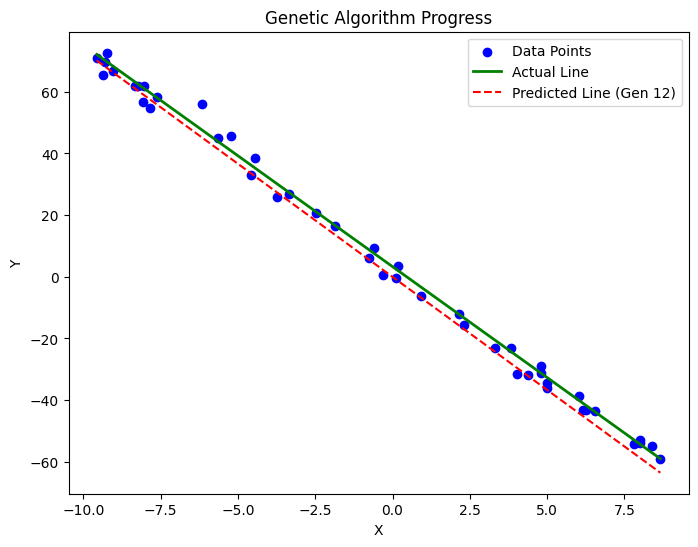

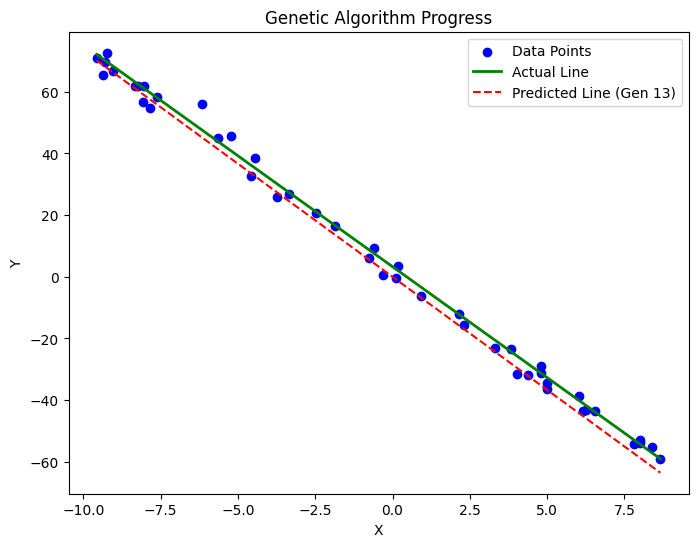

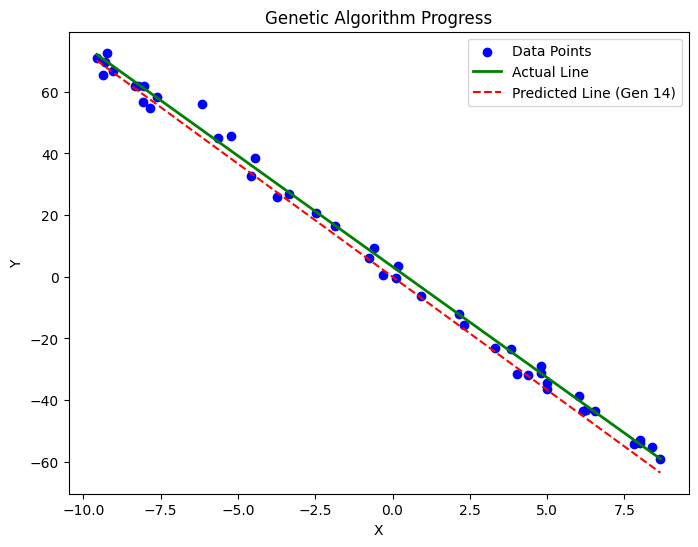

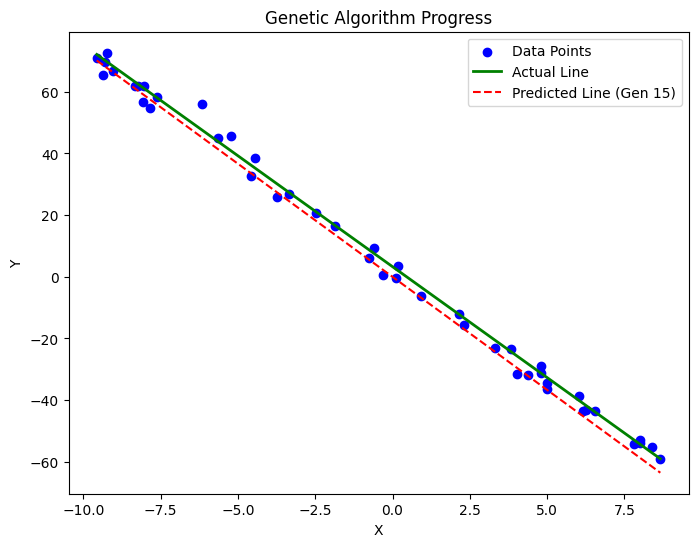

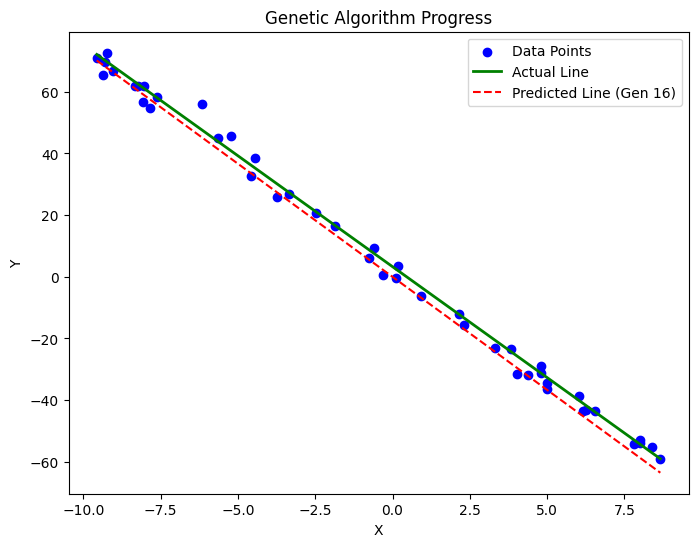

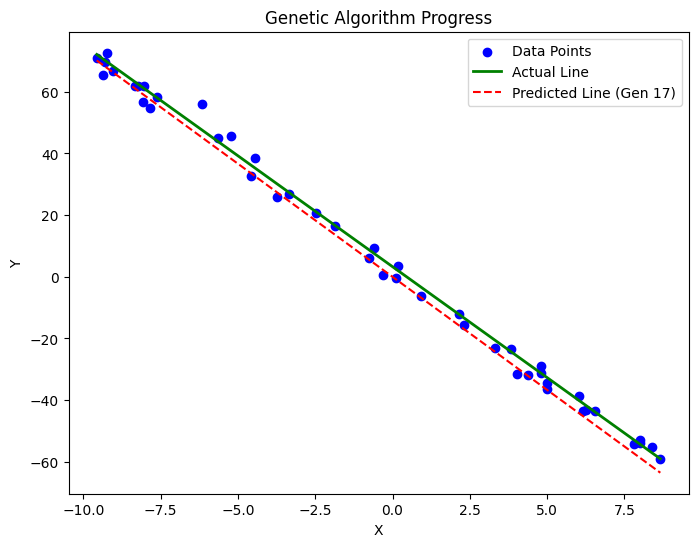

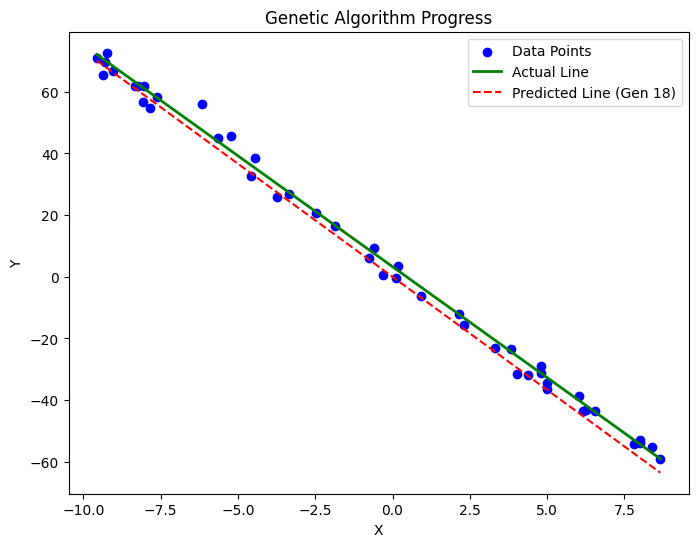

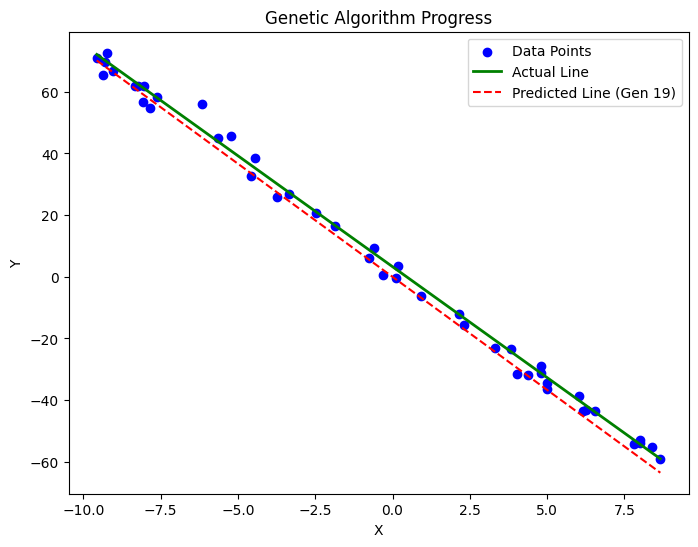

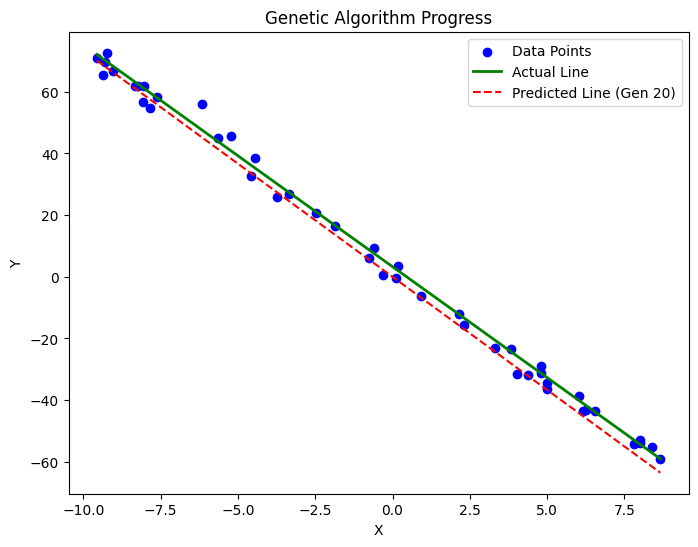

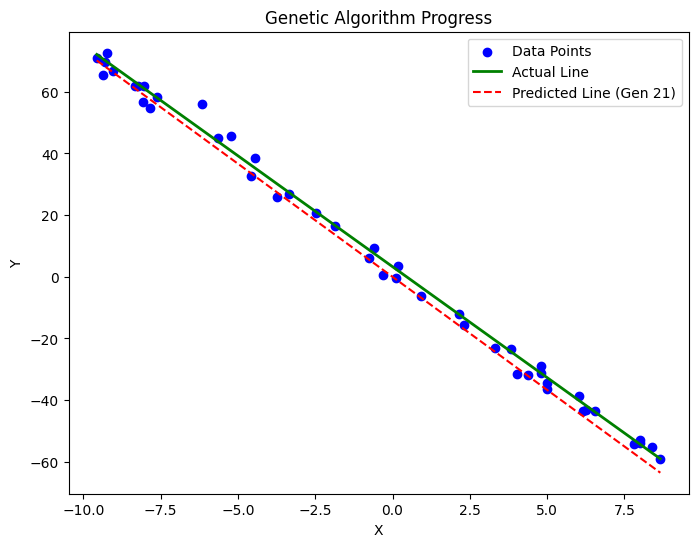

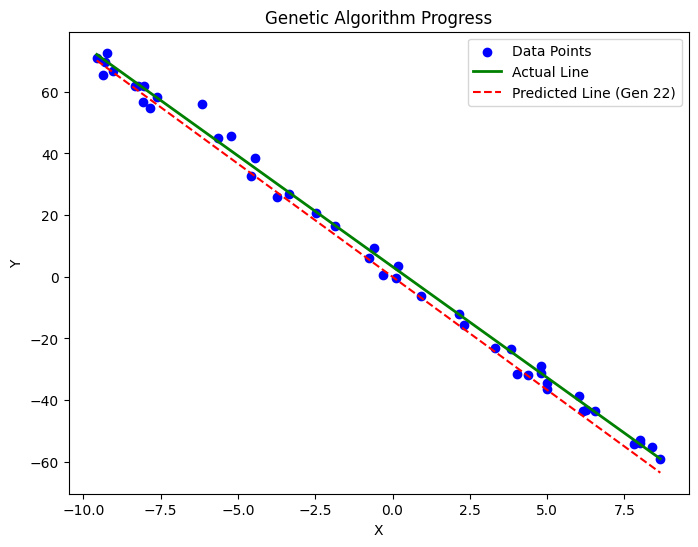

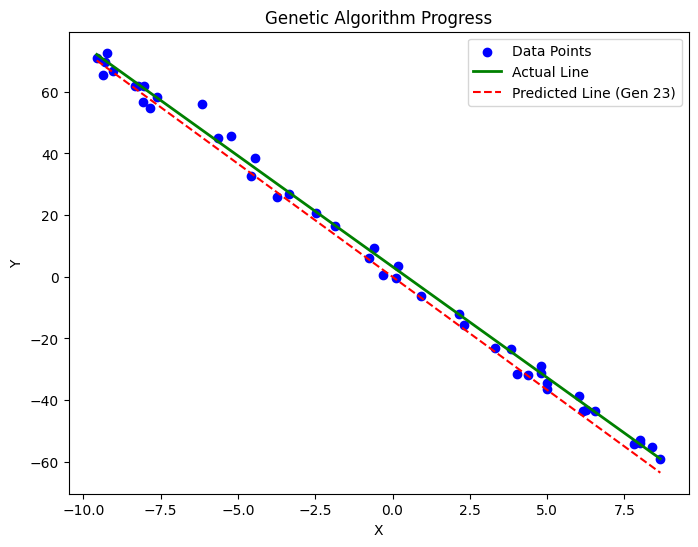

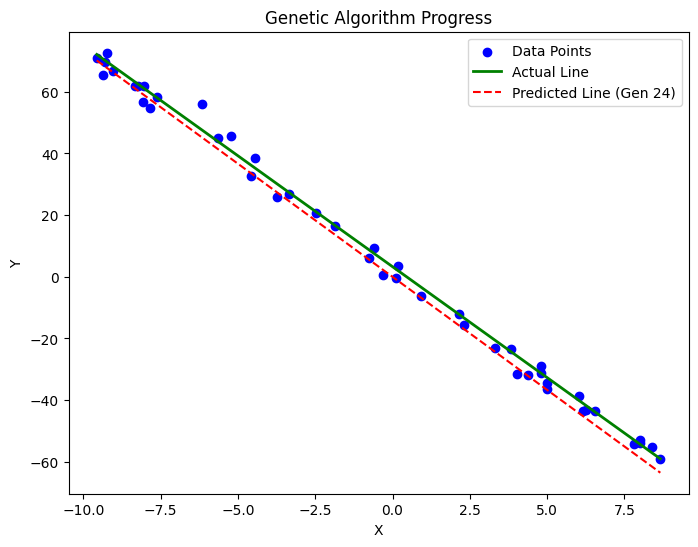

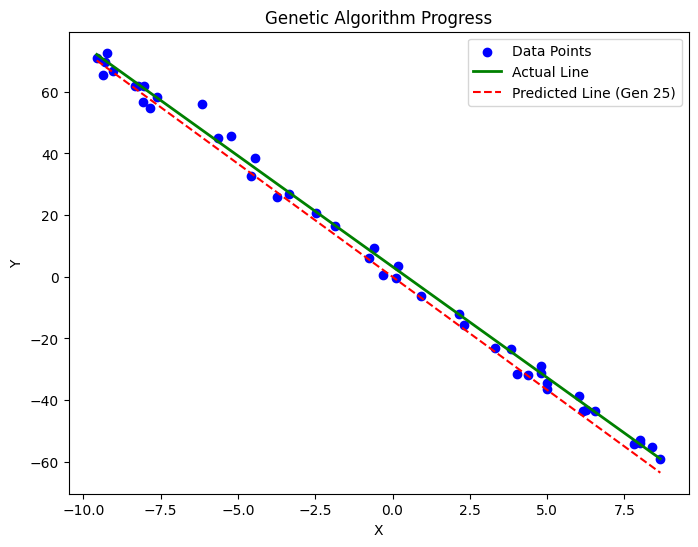

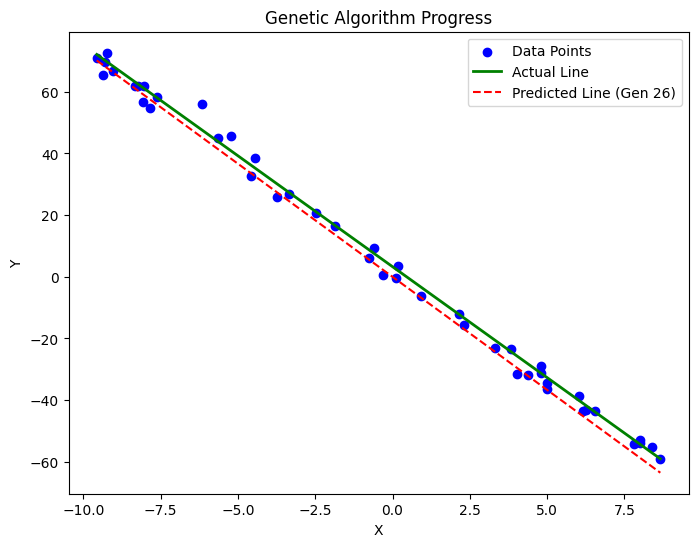

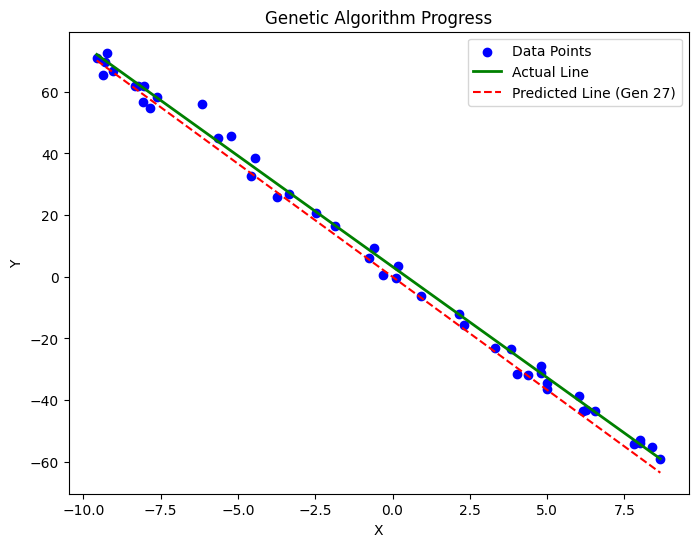

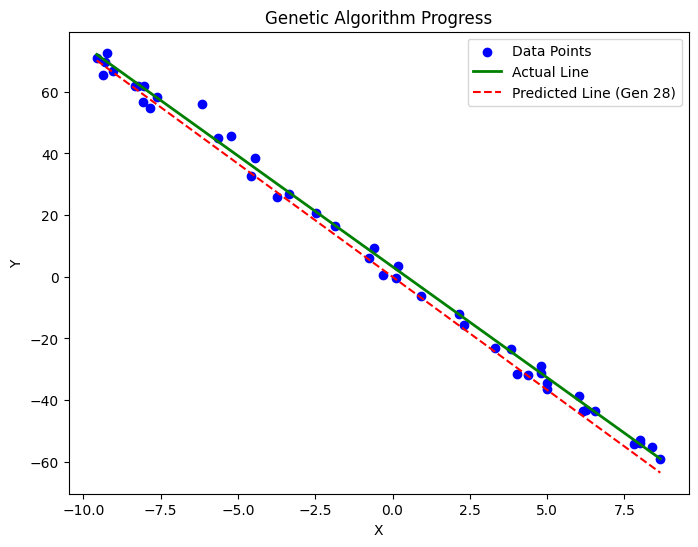

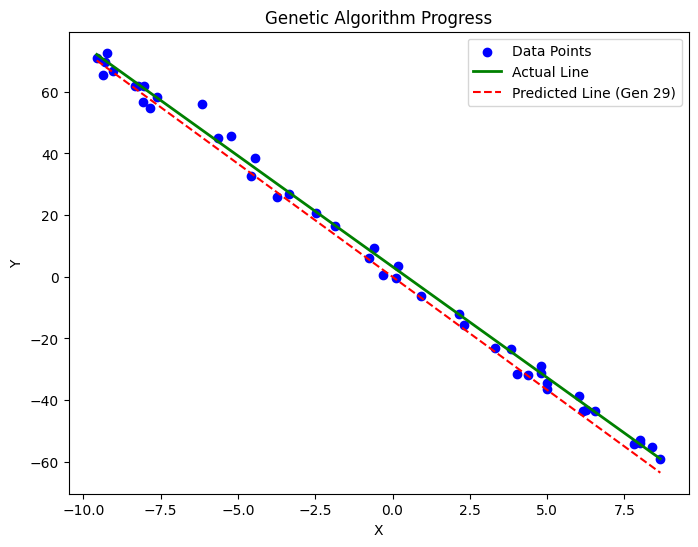

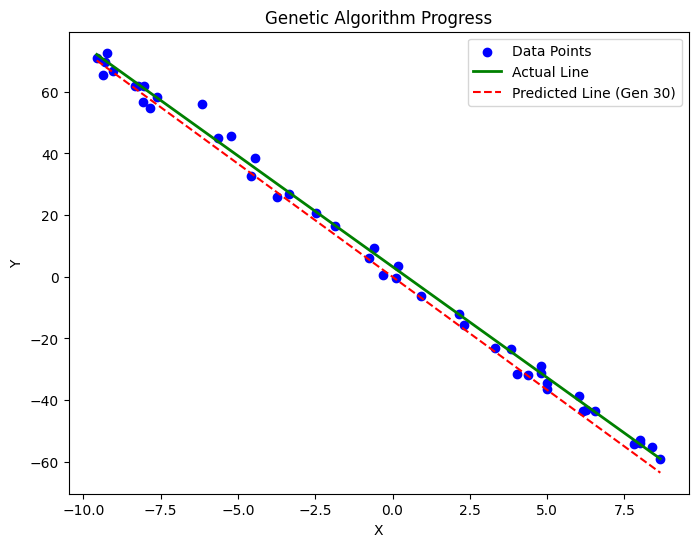

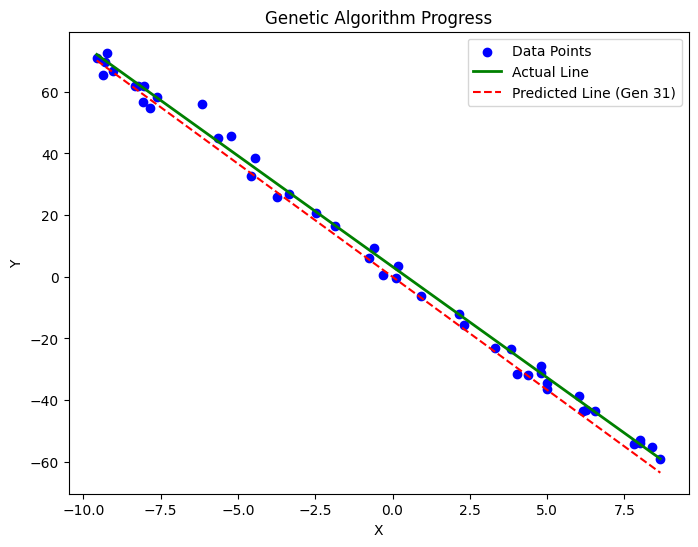

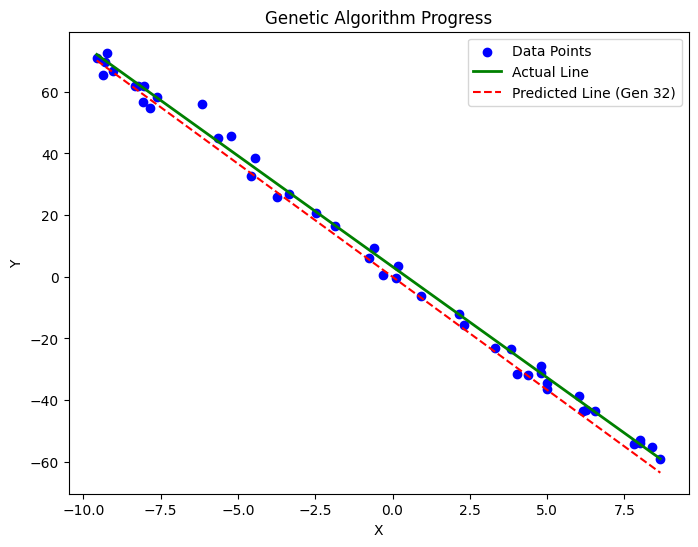

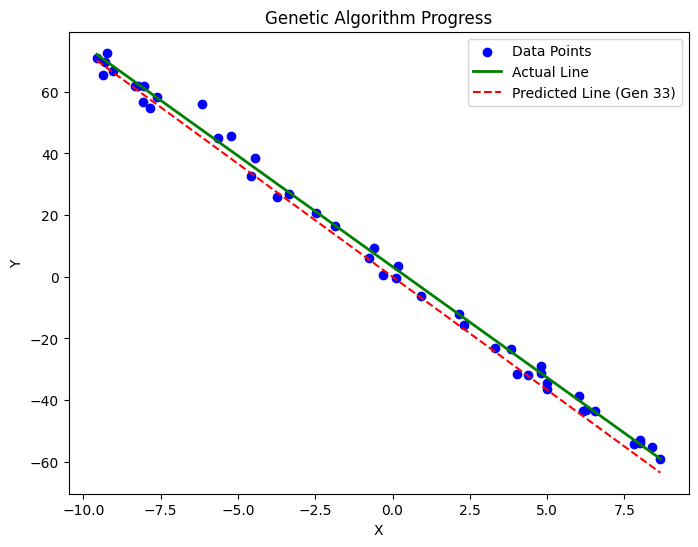

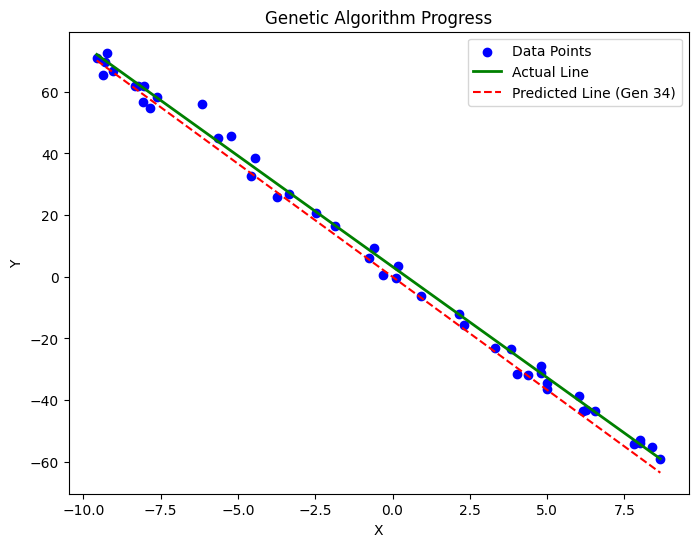

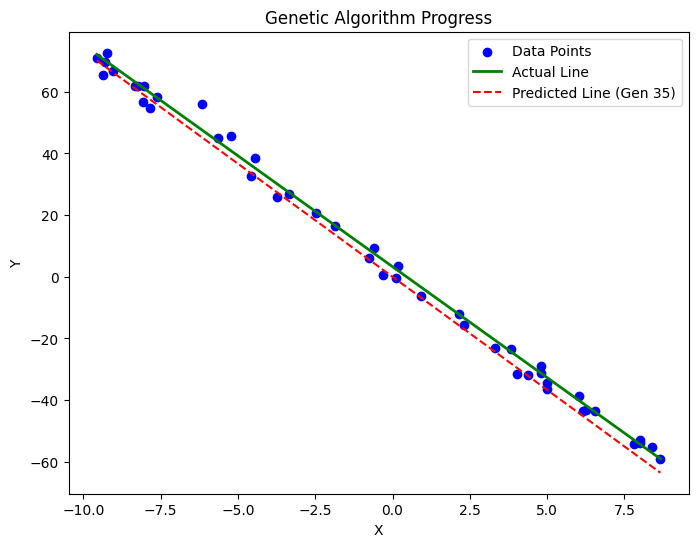

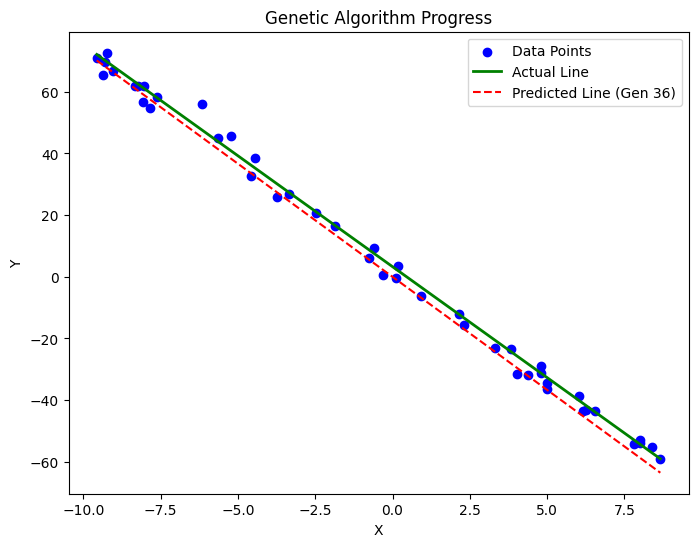

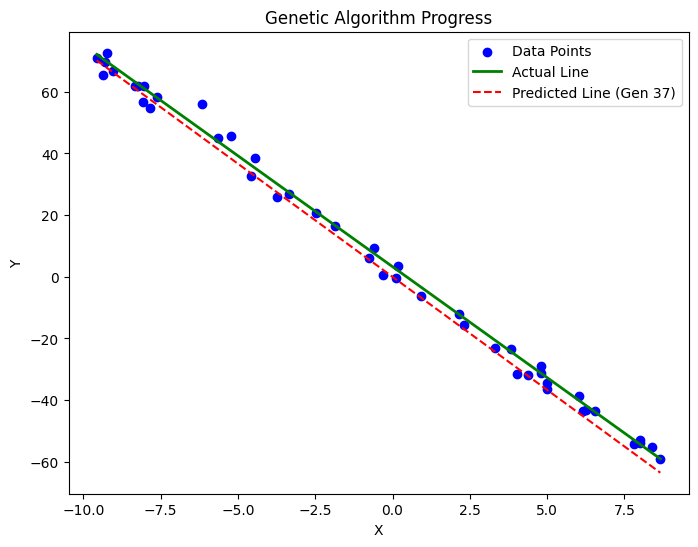

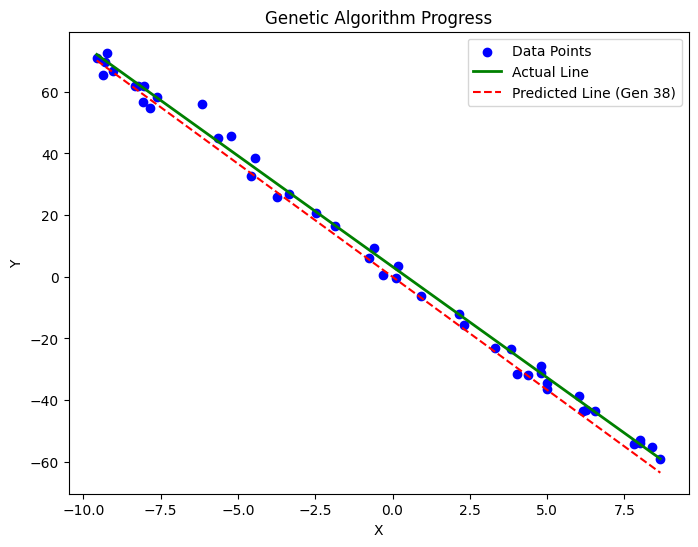

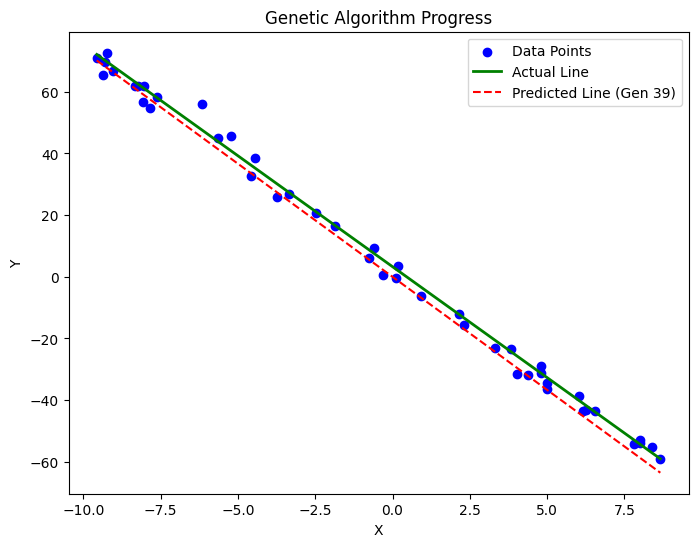

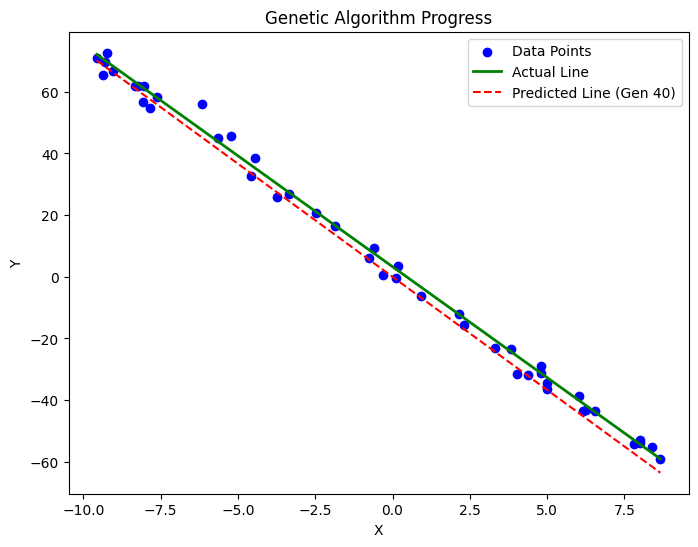

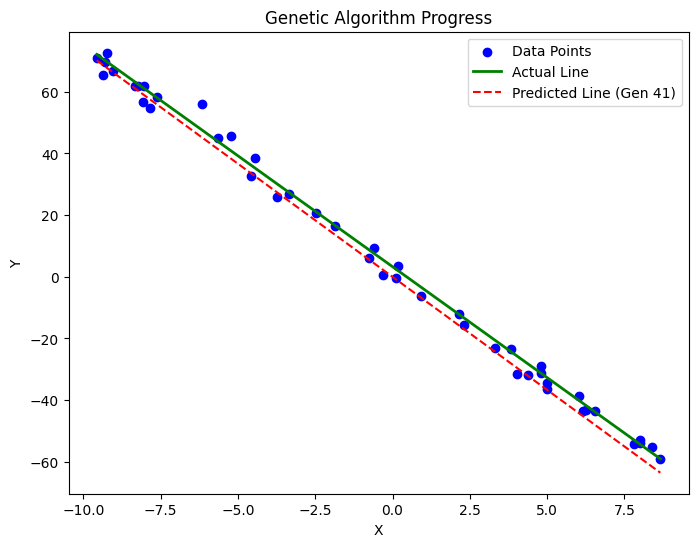

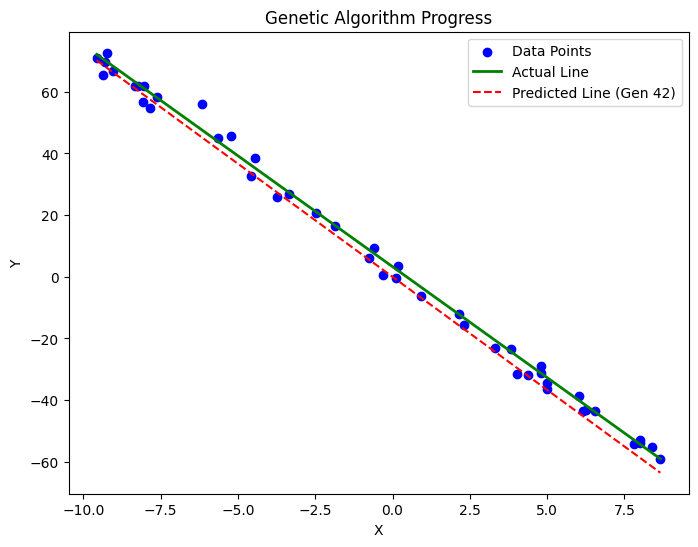

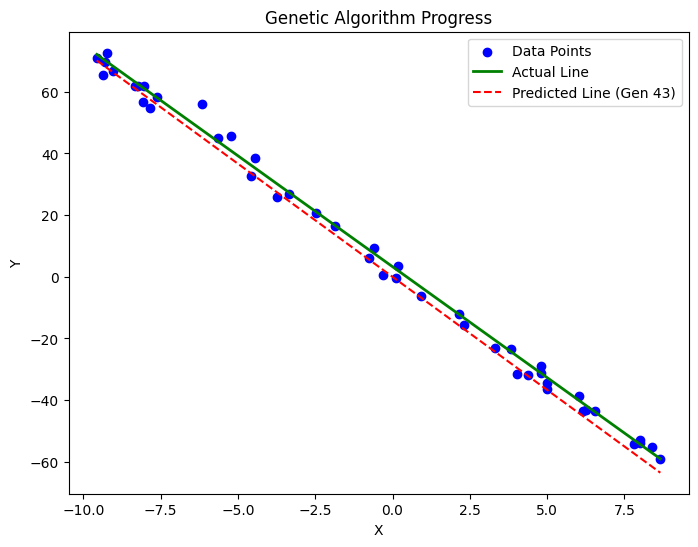

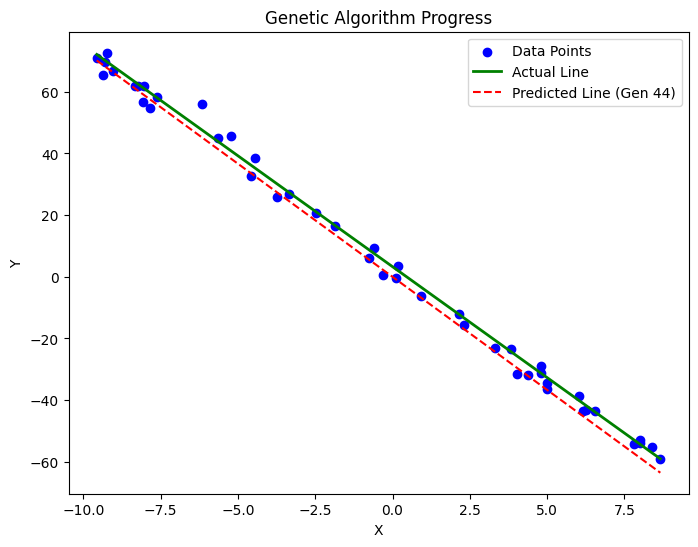

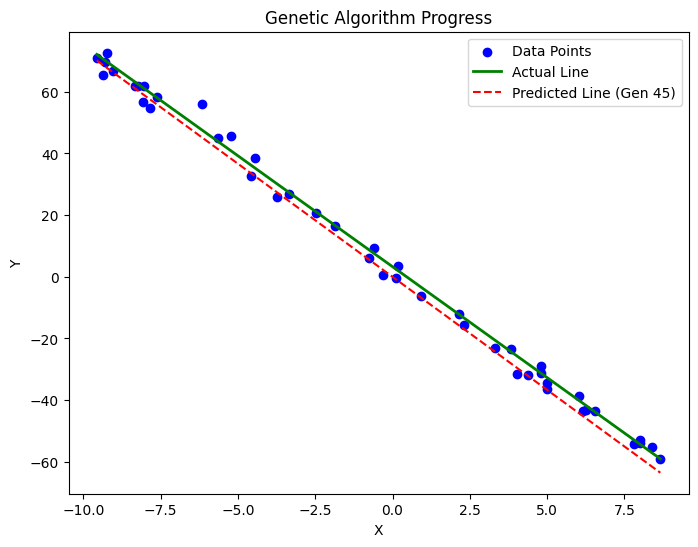

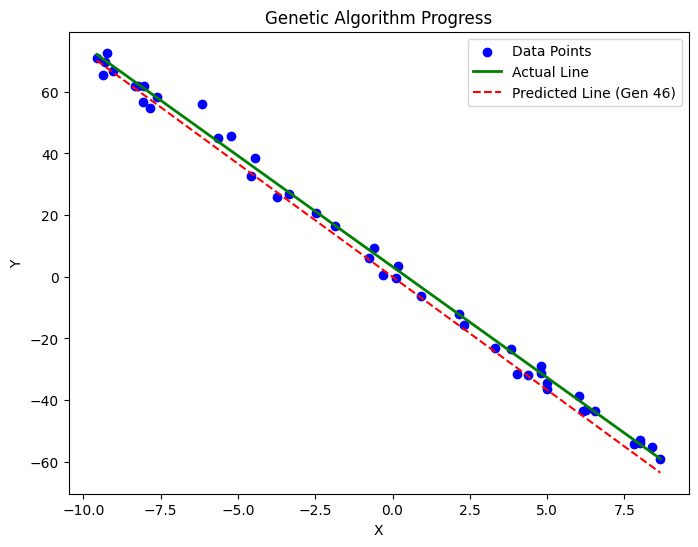

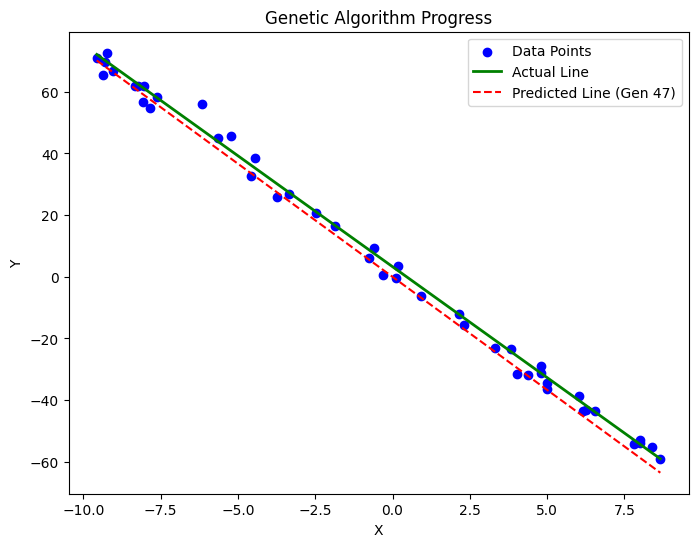

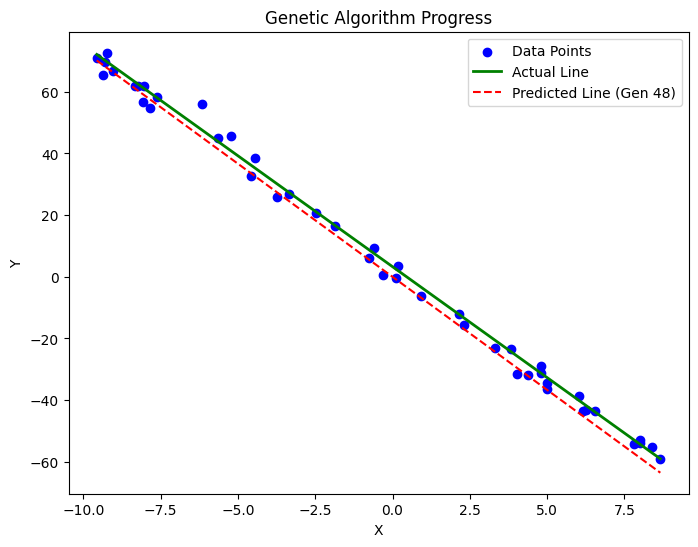

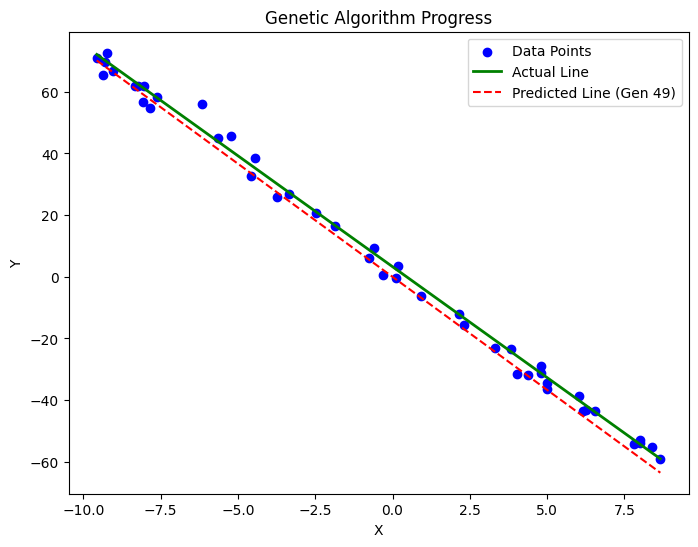

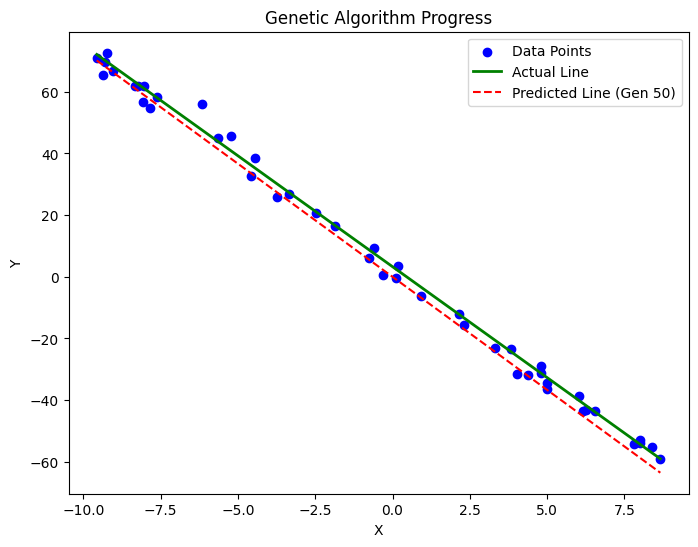

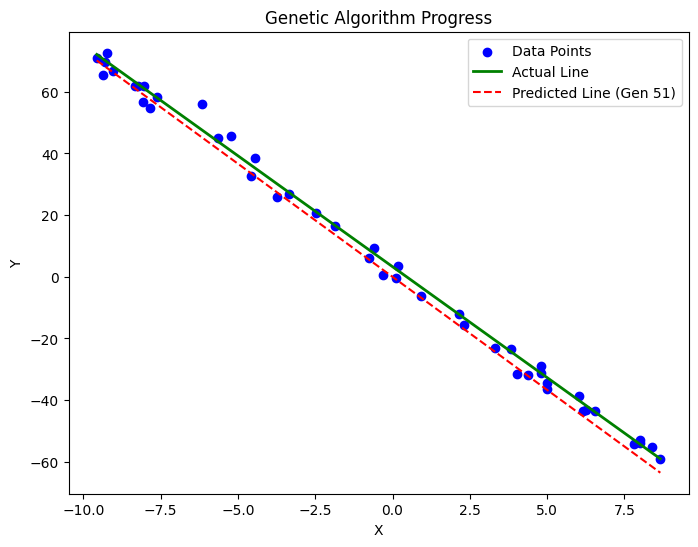

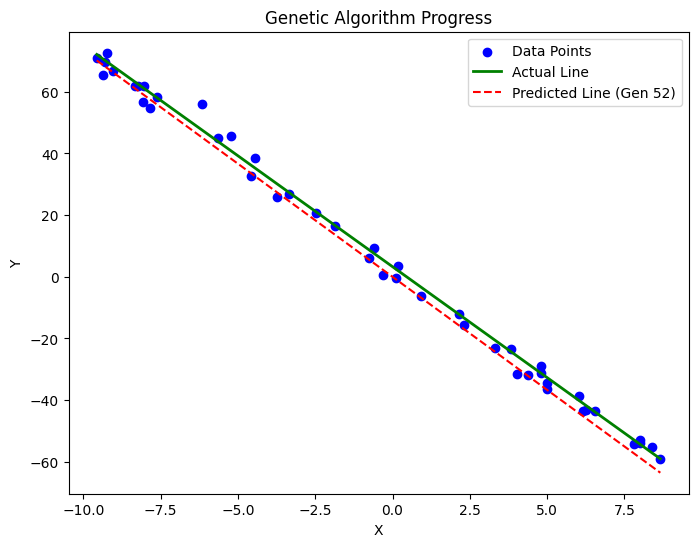

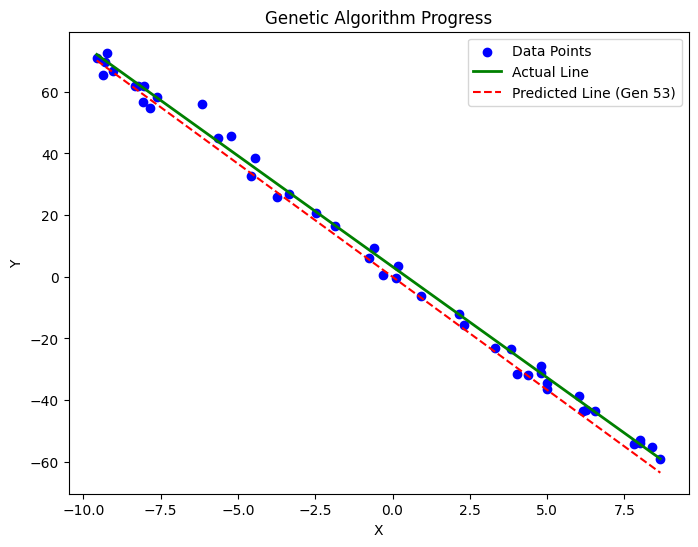

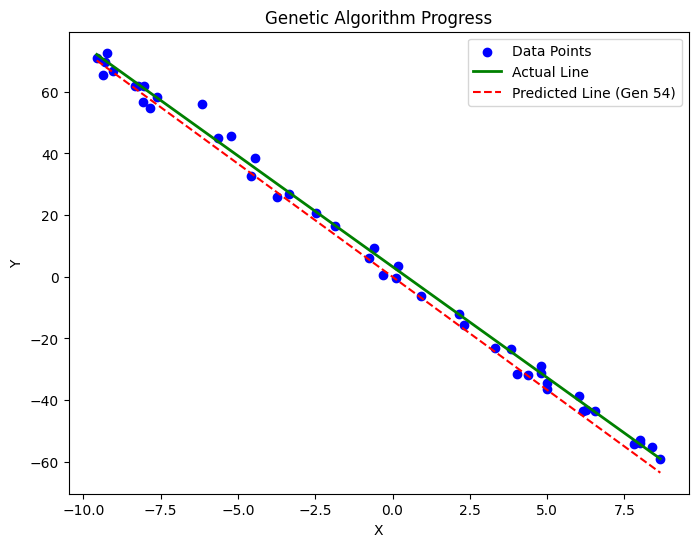

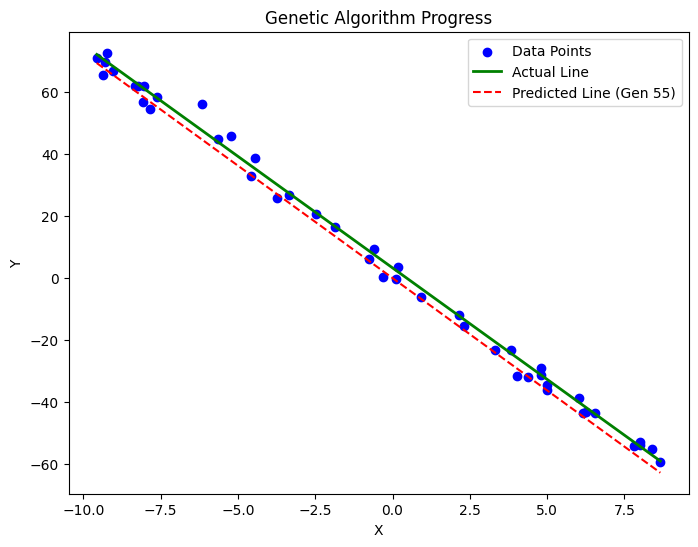

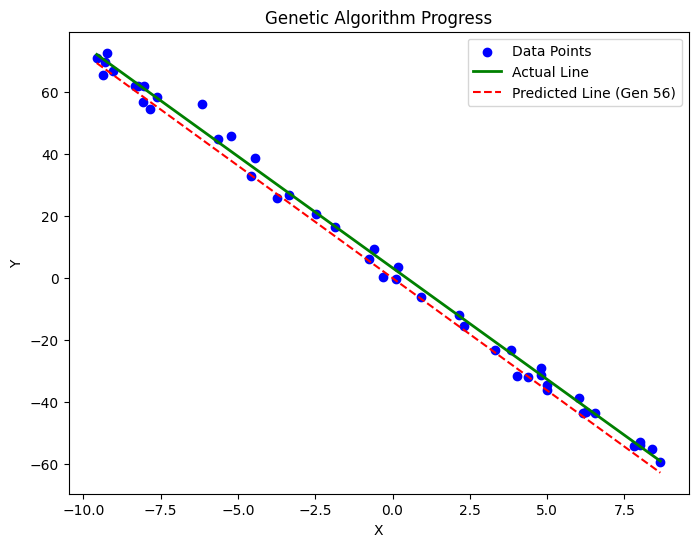

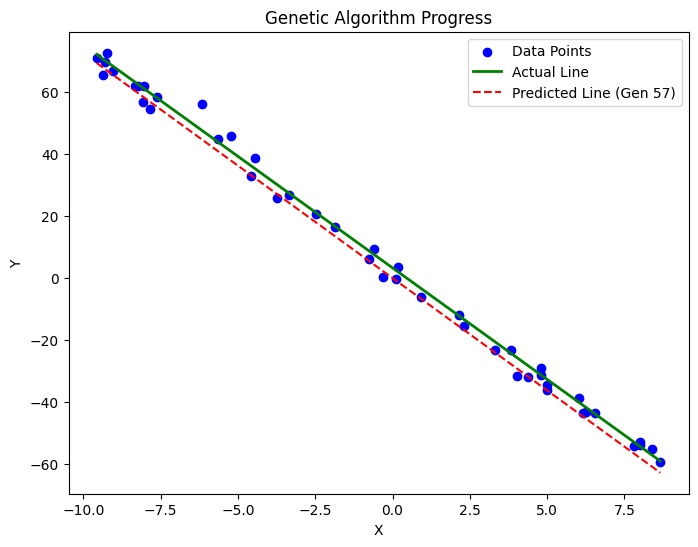

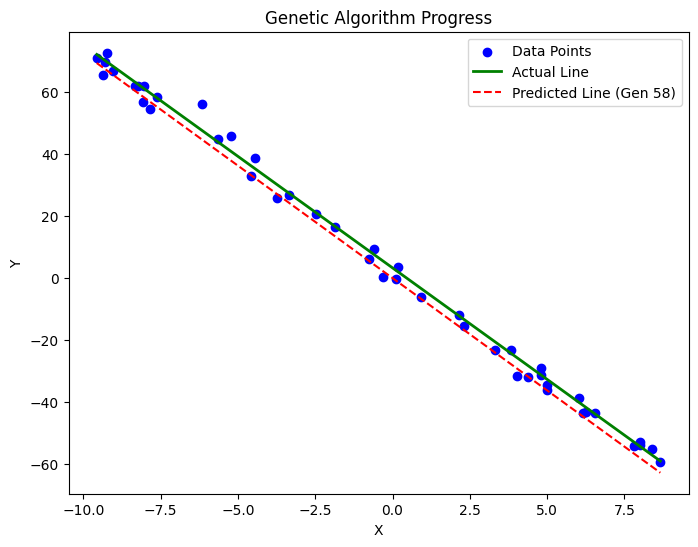

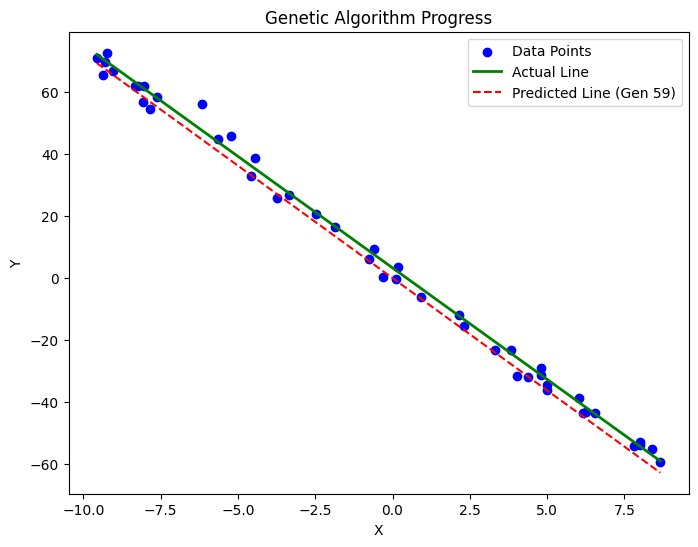

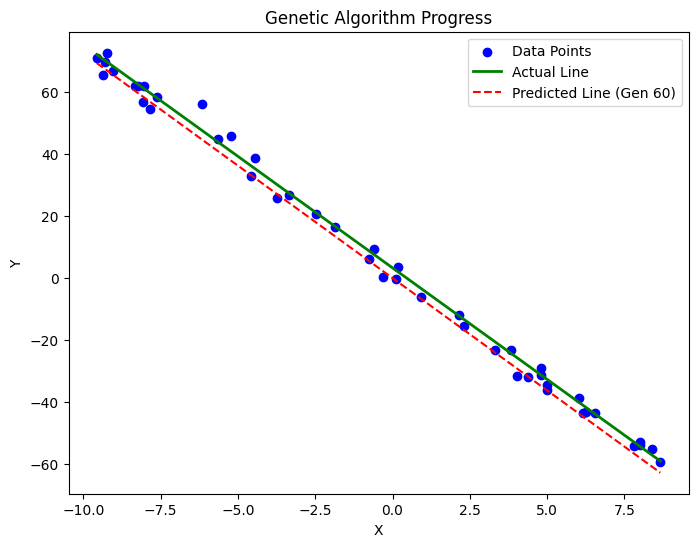

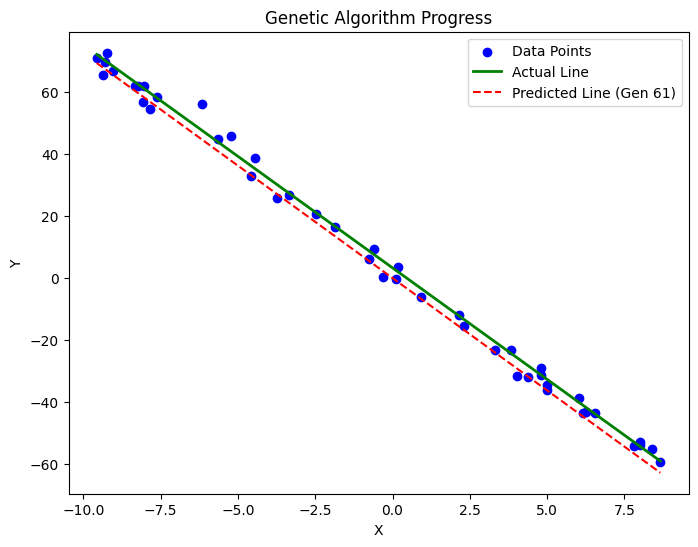

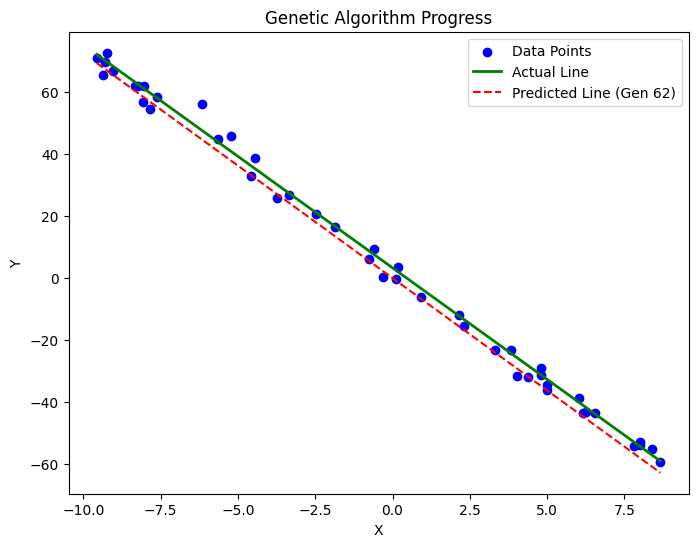

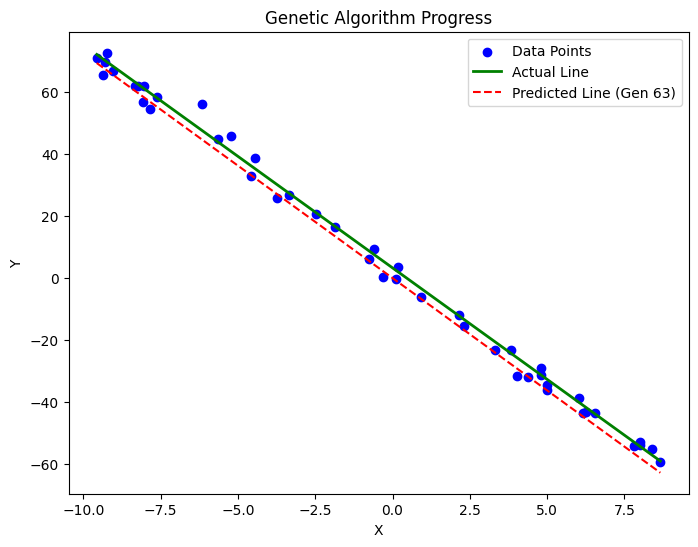

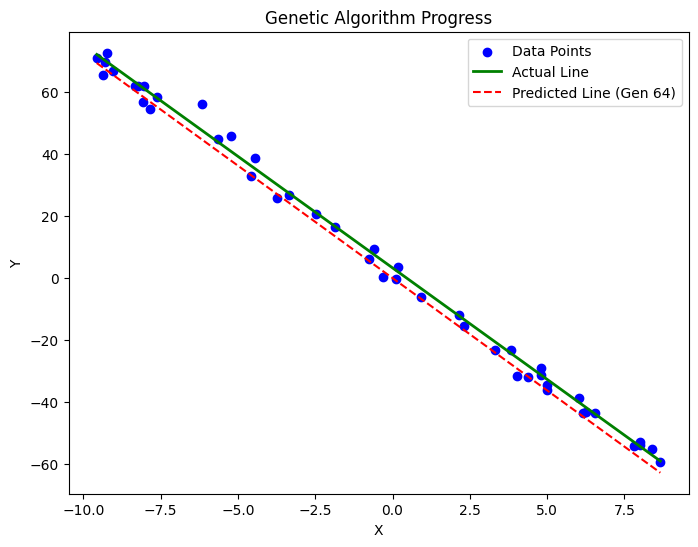

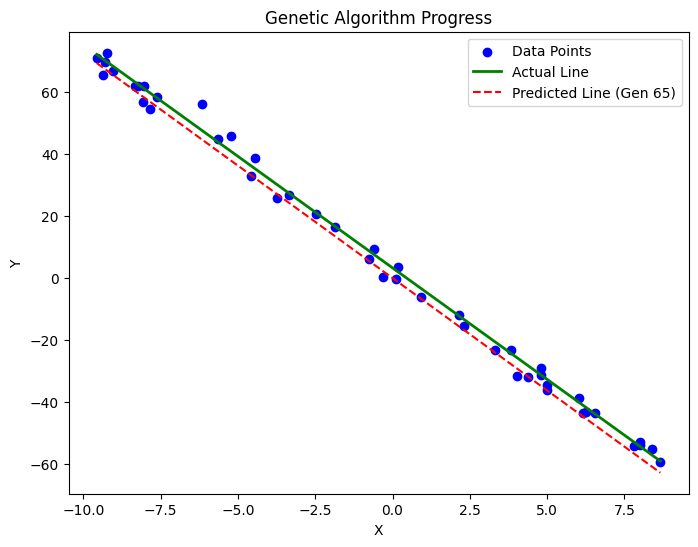

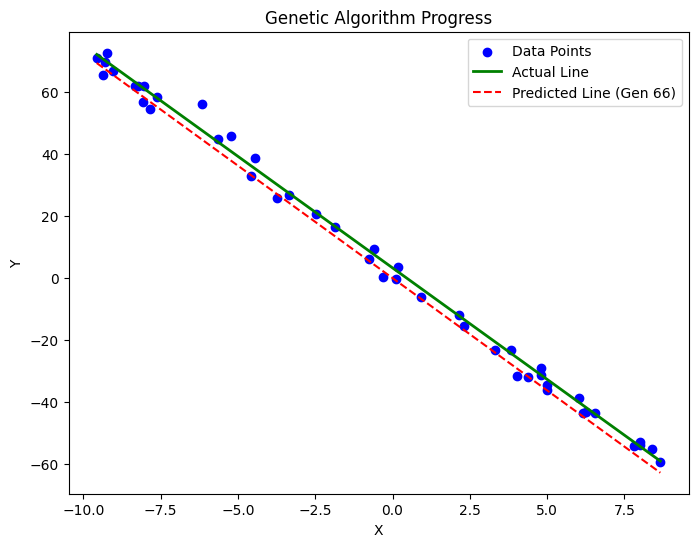

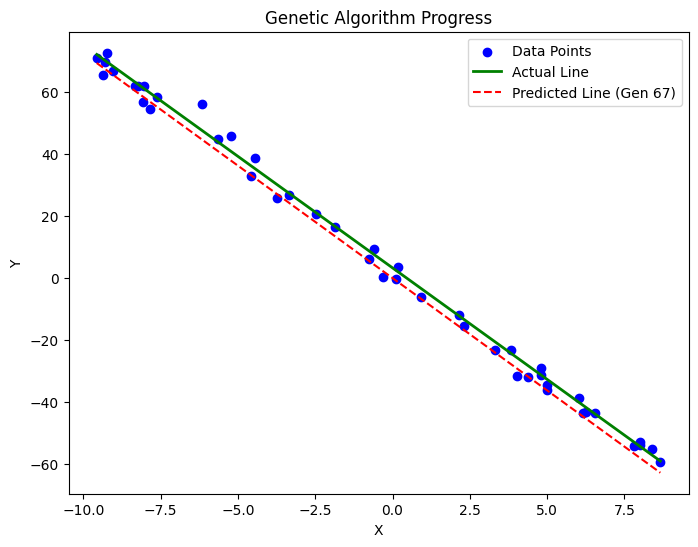

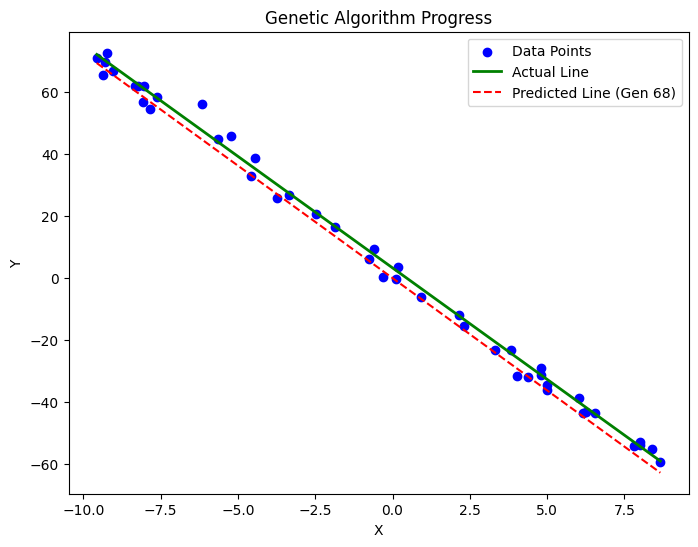

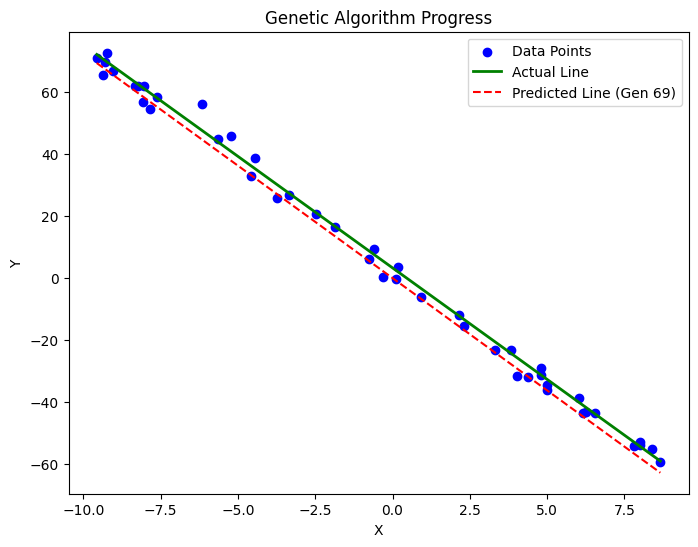

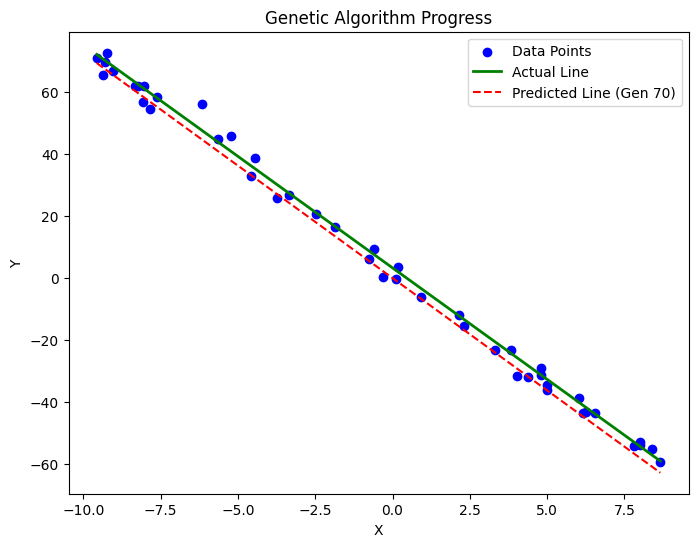

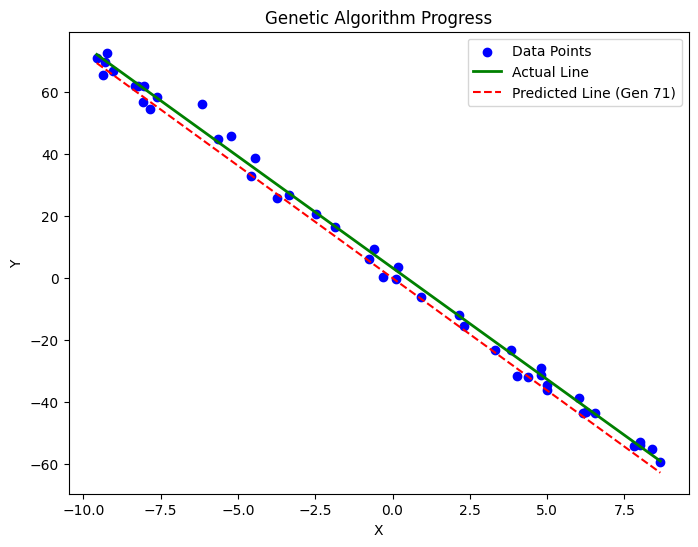

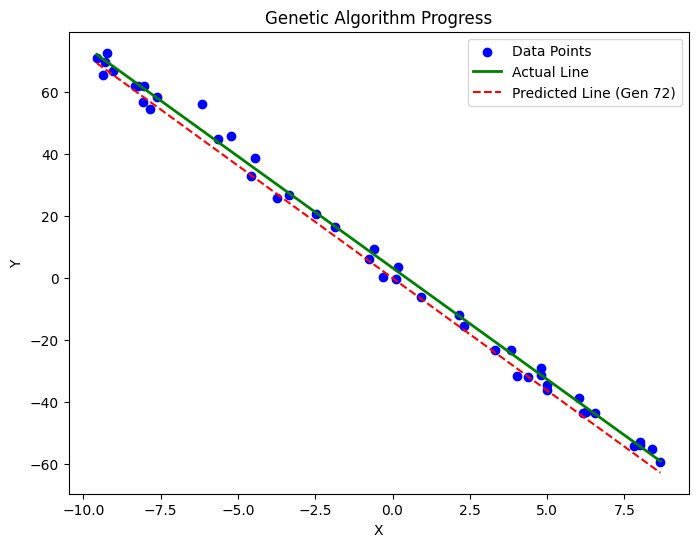

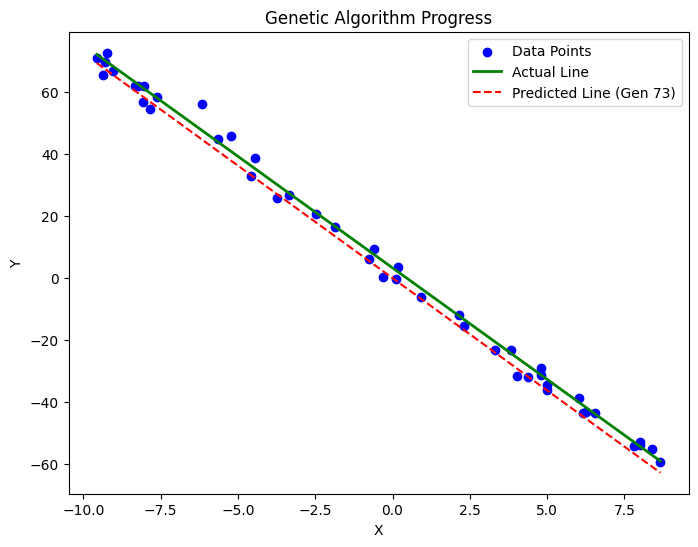

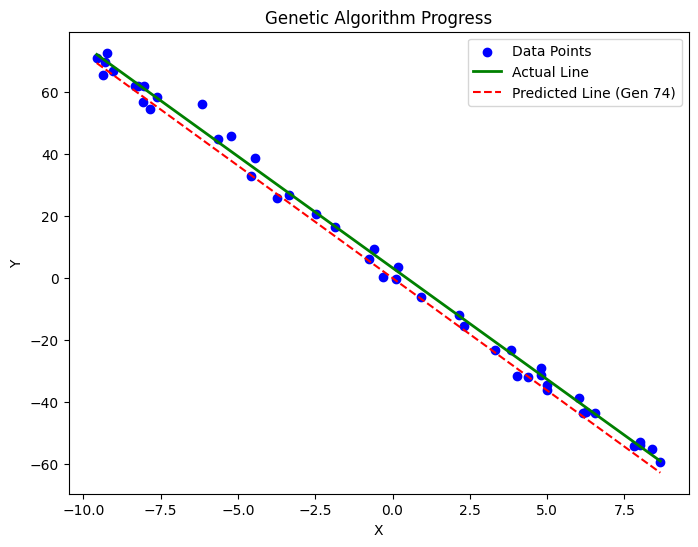

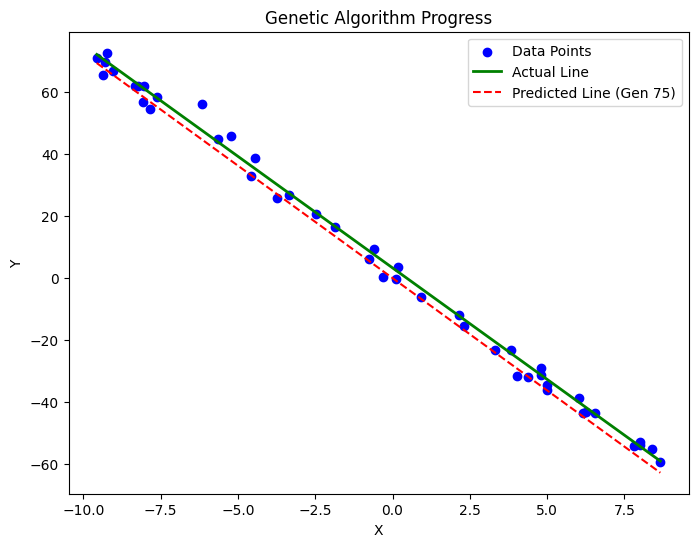

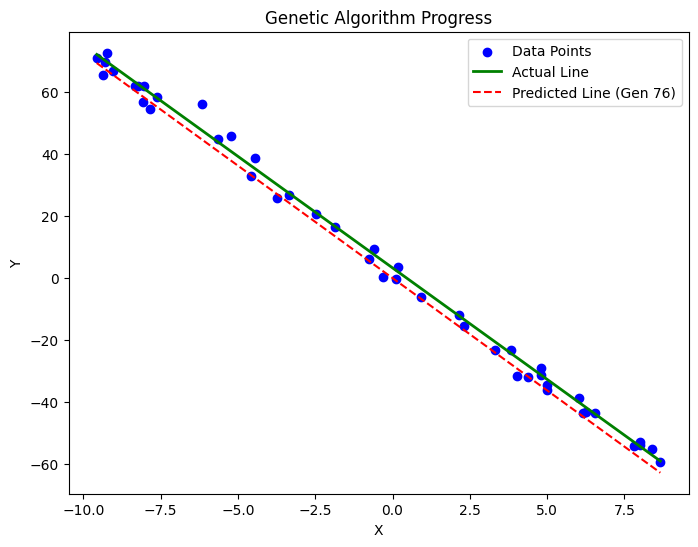

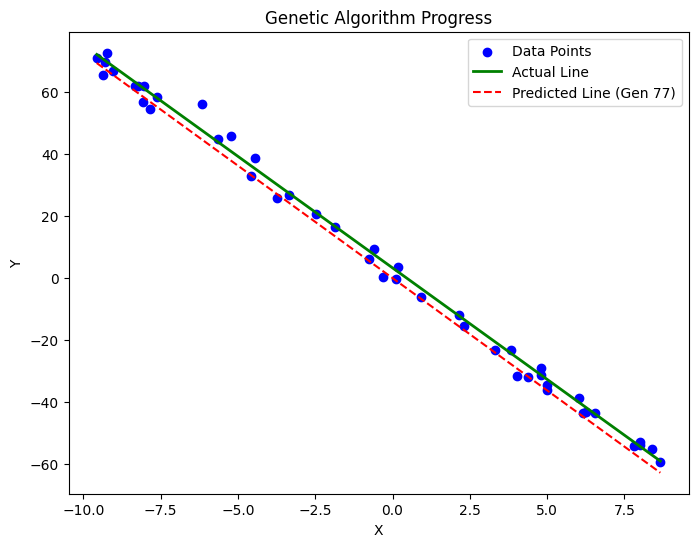

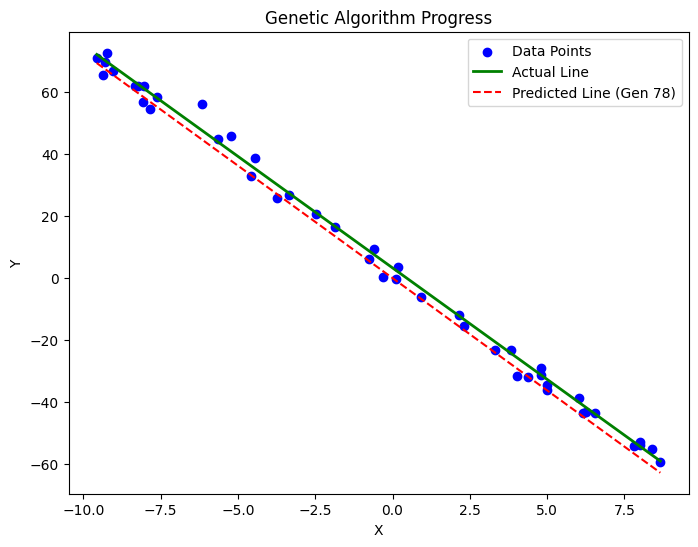

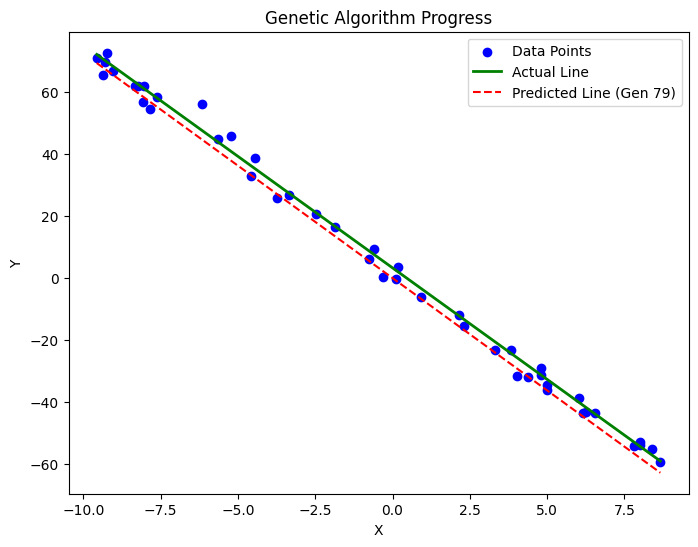

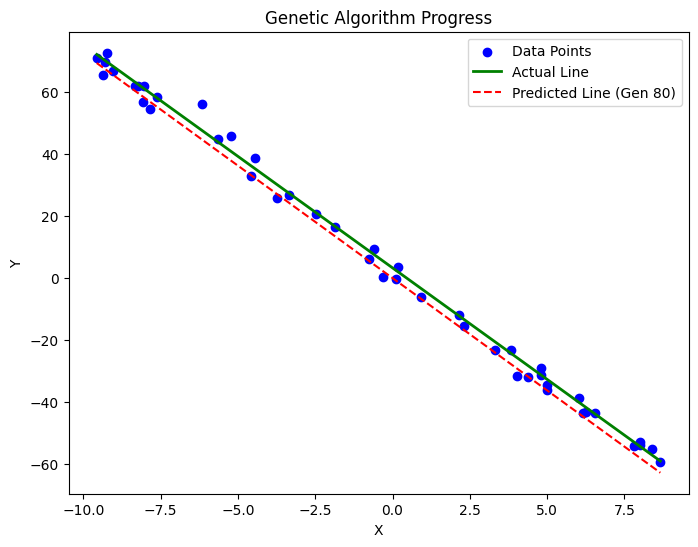

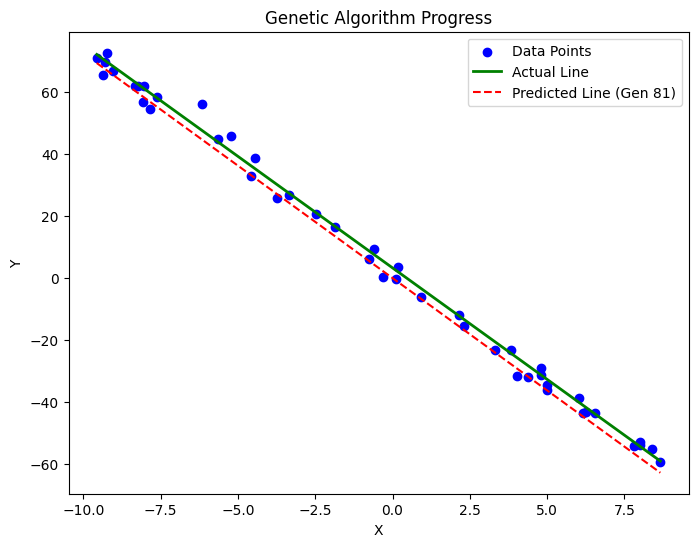

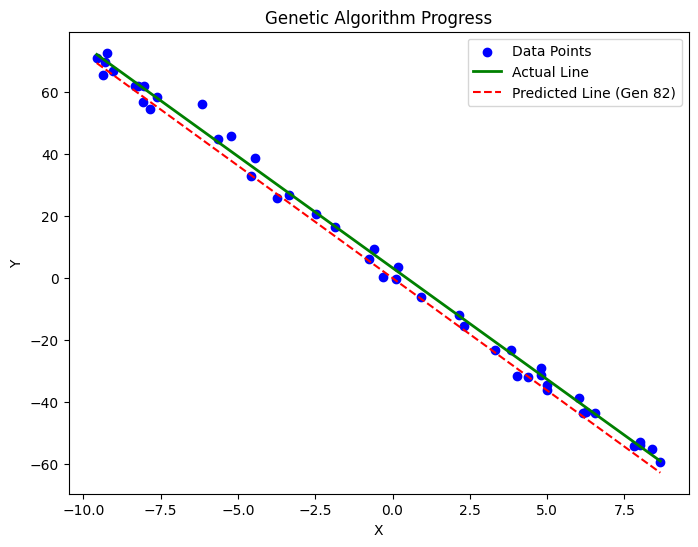

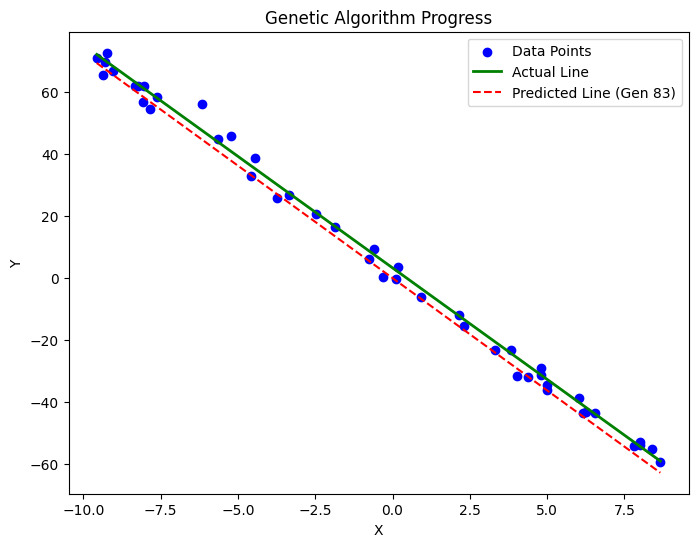

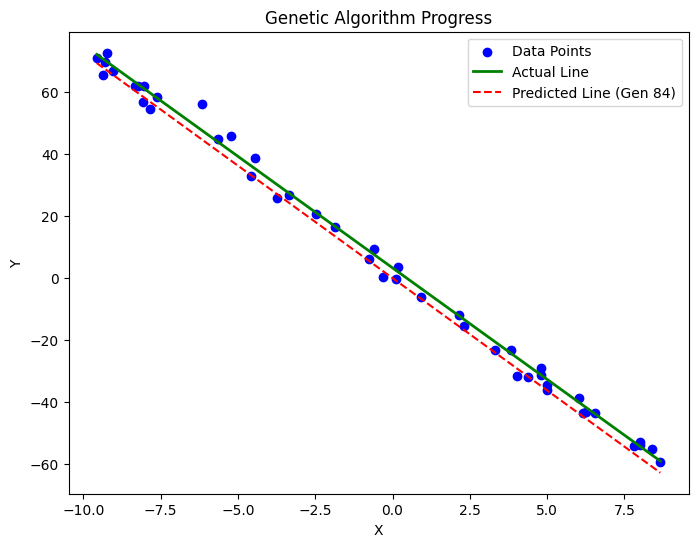

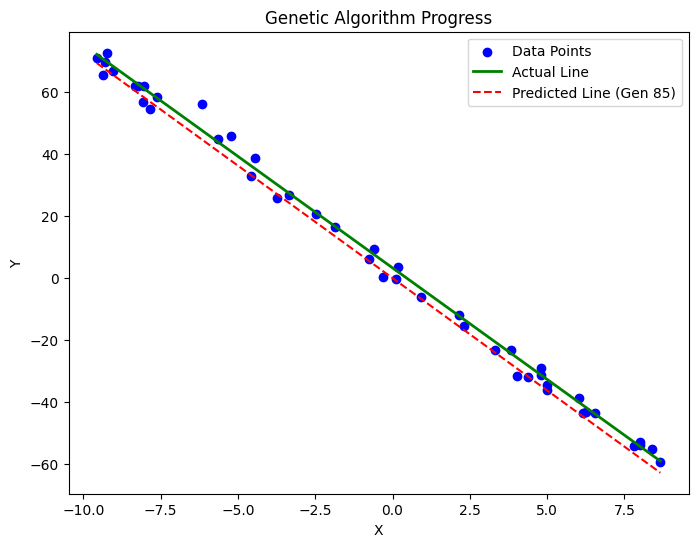

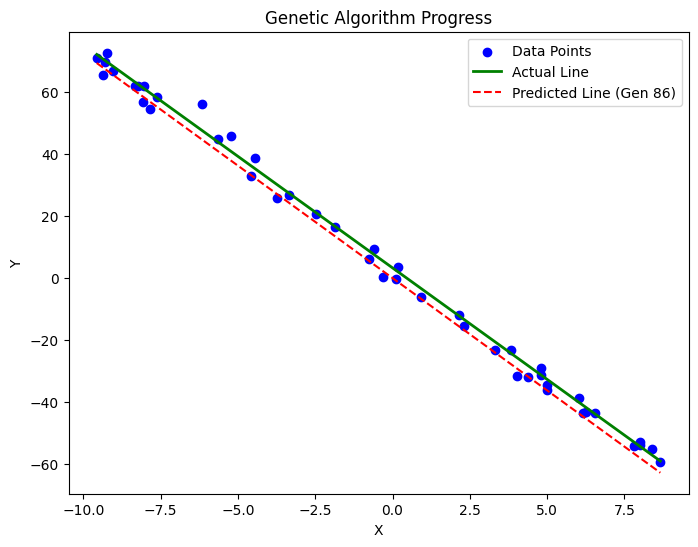

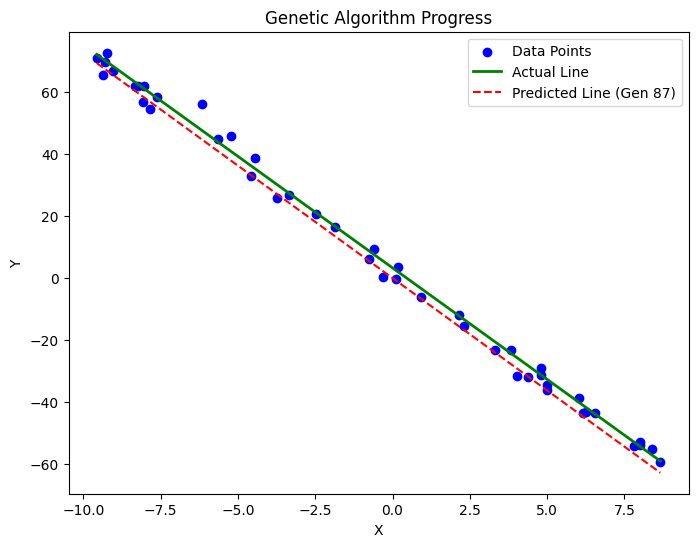

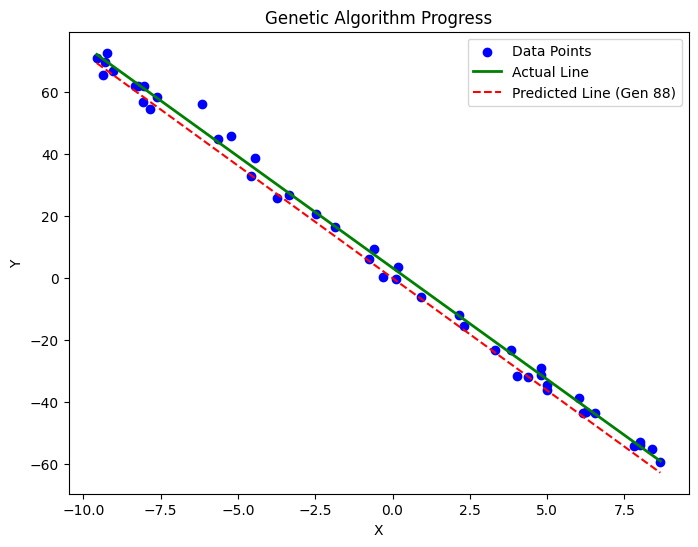

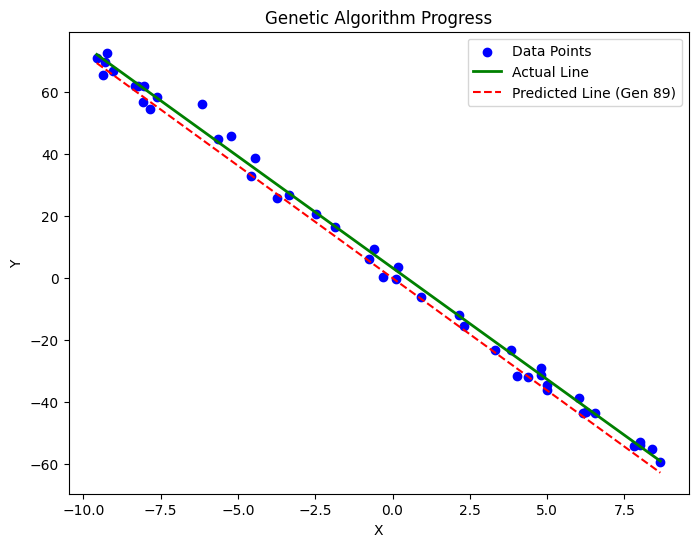

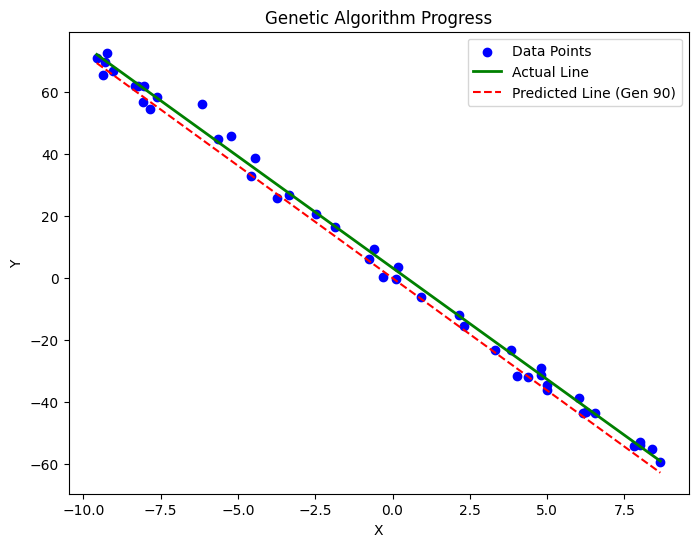

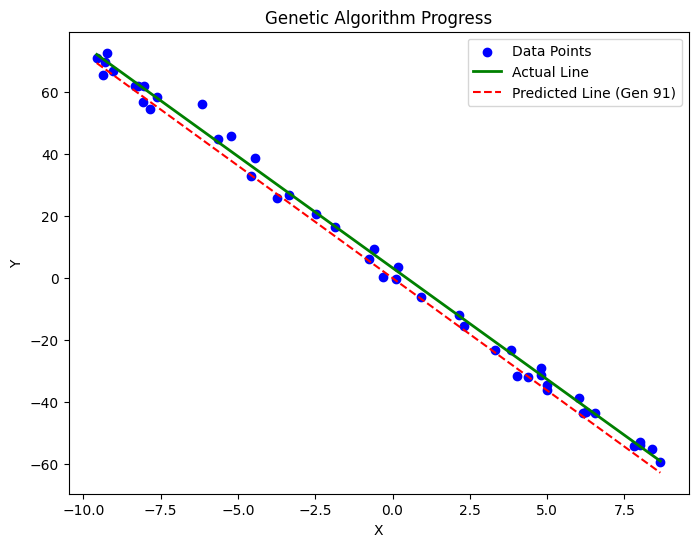

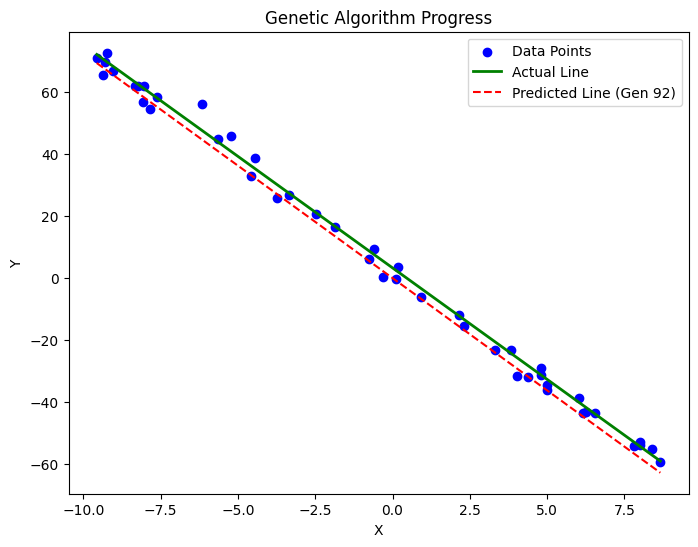

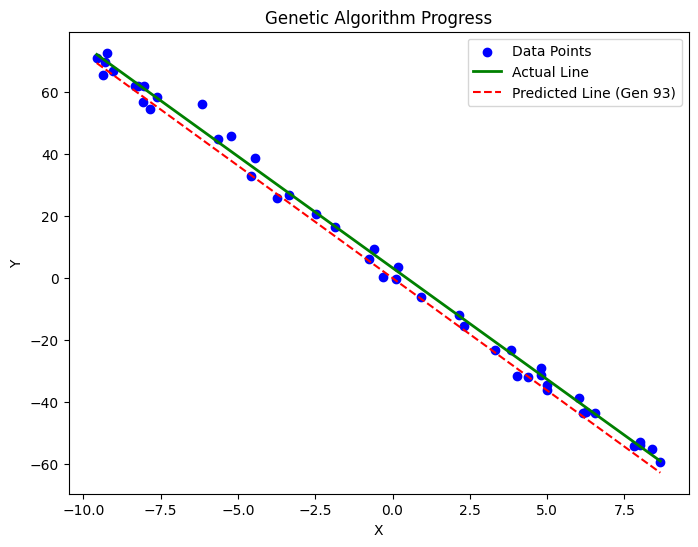

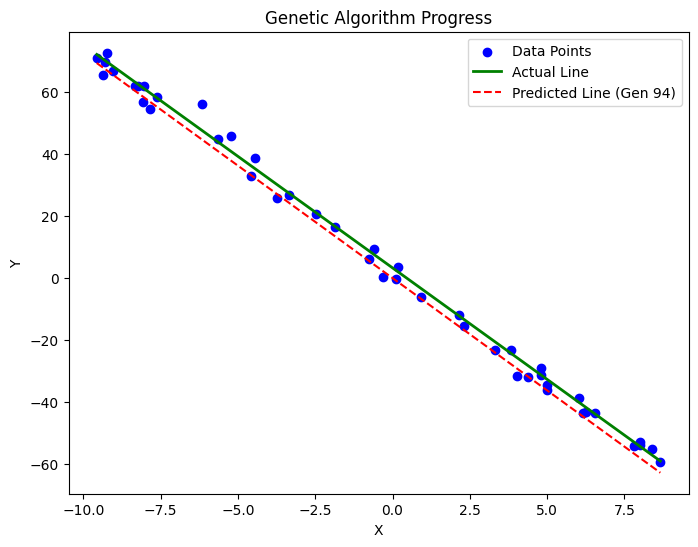

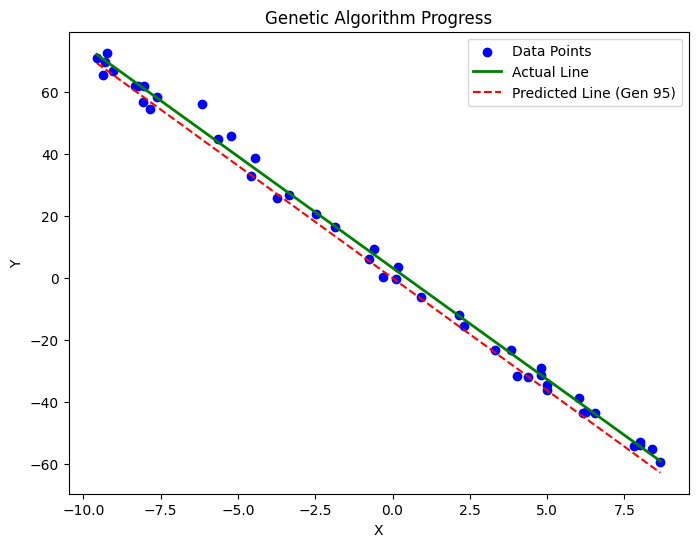

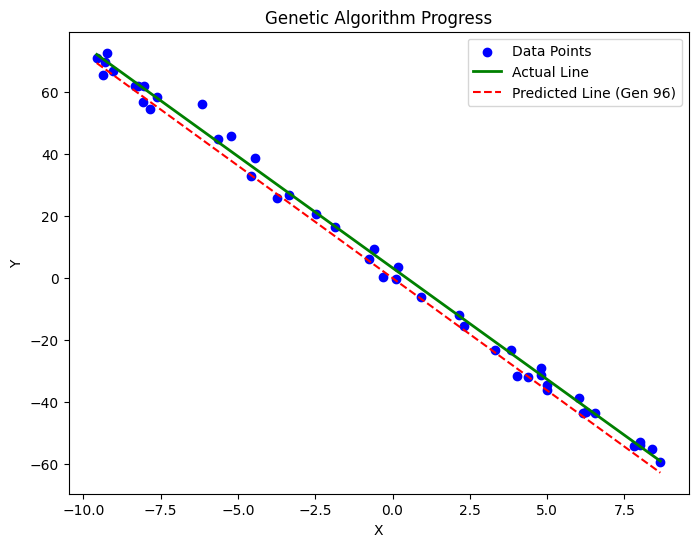

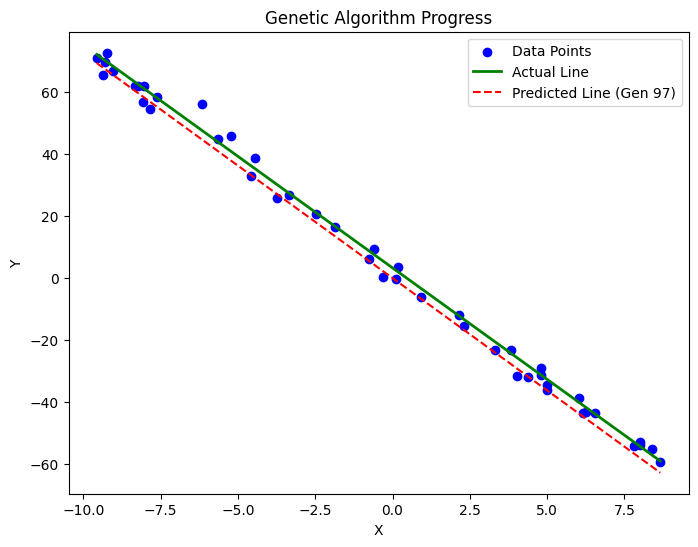

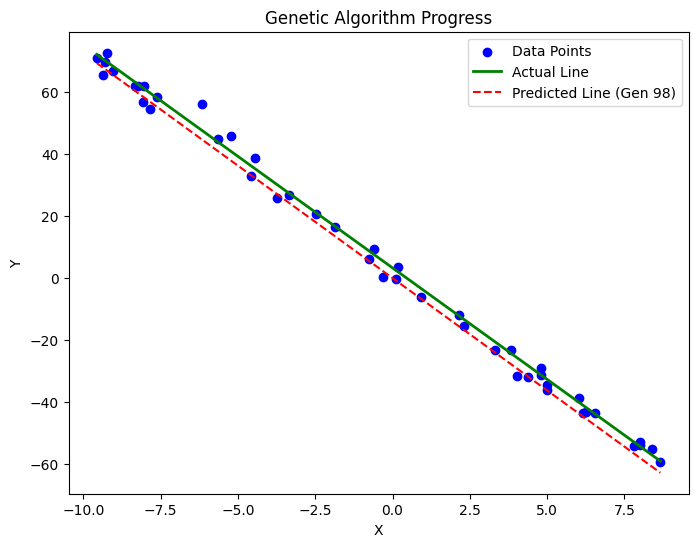

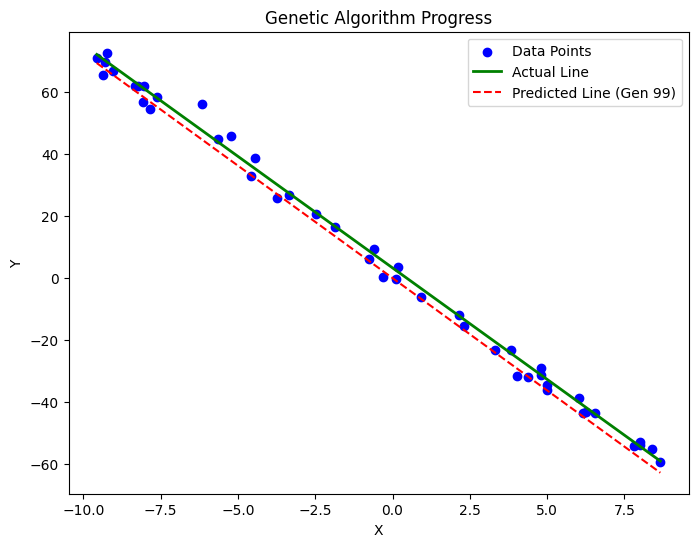

Final Best Line: [-7.2508904206956055, -7.143736560937651e-16]
Final Error: 639.4995758235748


In [ ]:
genetic_algorithm()